In [50]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import holidays
from datetime import date
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
#Setting large figure size for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":18})

In [4]:
data_dir = 'data'
orders = pd.read_excel(data_dir+'/Orders.xlsx')
customers = pd.read_excel(data_dir+'/Customers.xlsx')

## 0 Data Analysis

In [5]:
print(orders.shape)
orders.head()

(131706, 8)


,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [6]:
print(customers.shape)
customers.head()

(22625, 4)


,Customer_ID,GENDER,AGE,GEOGRAPHY
0,2547,F,48,Spain
1,822,F,39,Germany
2,3686,F,56,Greece
3,3719,F,49,Spain
4,9200,M,18,Italy


In [7]:
print(orders['SKU'].value_counts())
print(orders['SKU_Category'].value_counts())

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
         ... 
DV08L       1
NXHF1       1
4YL6Q       1
T6EUH       1
9E9GV       1
Name: SKU, Length: 5242, dtype: int64
N8U    10913
R6E     5099
LPF     5062
P42     4836
U5F     4570
       ...  
M8H        3
U3N        2
QON        1
2JO        1
OTK        1
Name: SKU_Category, Length: 187, dtype: int64


In [8]:
orders.describe()

,id,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485318,11.981524
std,38020.391614,6086.447552,18709.901238,3.872666,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


In [10]:
orders[orders.Quantity == 0]

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount


In [11]:
orders = orders.loc[orders.Quantity % 1 == 0]
orders.Quantity = orders.Quantity.apply(lambda x: int(x))
orders.head()

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2021-01-02,2547,1,X52,0EM7L,1,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1,6.88


In [ ]:
orders[orders.Quantity > 100]

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
17084,17085,2021-02-19,6869,8186,LGI,VWLV9,176,74.80
64680,64681,2021-06-29,17025,32069,LGI,VWLV9,176,74.80
77676,77677,2021-09-07,19791,42595,H8O,CKDW0,400,16.37
94222,94223,2021-10-13,20055,49727,H8O,CKDW0,200,8.18
112719,112720,2021-11-27,1694,57951,H8O,CKDW0,300,12.27
113907,113908,2021-11-30,11634,58440,XG4,MAJO7,200,15.00
118682,118683,2021-12-10,16147,60457,H8O,CKDW0,200,8.18
121888,121889,2021-12-16,18365,61798,H8O,CKDW0,200,8.18


In [ ]:
orders[orders.SKU == 'MAJO7']

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
34020,34021,2021-04-08,17951,16671,XG4,MAJO7,12,0.90
54133,54134,2021-05-30,19996,26889,XG4,MAJO7,20,1.75
67803,67804,2021-08-09,19996,38278,XG4,MAJO7,20,1.75
70714,70715,2021-08-17,20576,39484,XG4,MAJO7,4,0.34
74011,74012,2021-08-25,10712,40935,XG4,MAJO7,100,7.50
74745,74746,2021-08-28,16783,41258,XG4,MAJO7,12,0.90
79395,79396,2021-09-11,20173,43325,XG4,MAJO7,5,0.38
80579,80580,2021-09-14,12524,43806,XG4,MAJO7,75,5.62
105668,105669,2021-11-10,20537,54829,XG4,MAJO7,90,7.88
112676,112677,2021-11-27,16916,57924,XG4,MAJO7,100,7.50


In [ ]:
customers.GEOGRAPHY.value_counts()

Germany        7970
Italy          4480
France         2644
Greece         2269
UK             2264
Spain          1651
Netherlands    1347
Name: GEOGRAPHY, dtype: int64

In [ ]:
customers.GENDER.value_counts()

F    11328
M    11297
Name: GENDER, dtype: int64

In [ ]:
orders.SKU_Category.value_counts()

N8U    10913
R6E     5099
LPF     5046
P42     4836
U5F     4568
       ...  
M8H        3
U3N        2
QON        1
2JO        1
OTK        1
Name: SKU_Category, Length: 187, dtype: int64

In [12]:
transactions = orders.groupby("Transaction_ID").agg(Customer_ID = ('Customer_ID', 'max'), diff_items = ('SKU', 'nunique'), total_items = ('Quantity', 'sum'),
                                                 order_value = ('Sales_Amount','sum'))
transactions[transactions.index == 32900]

,Customer_ID,diff_items,total_items,order_value
Transaction_ID,,,,
32900,20203,7,11,47.92


### 1 Statistics

In [42]:
transactions = orders.groupby("Transaction_ID").agg(Customer_ID = ('Customer_ID', 'max'), diff_items = ('SKU', 'nunique'), total_items = ('Quantity', 'sum'),
                                                 order_value = ('Sales_Amount','sum'), date = ('Date', 'max'))
customer_transact = transactions.groupby("Customer_ID").agg(num_orders = ('Customer_ID', 'count'), avg_diff_items = ('diff_items', np.mean), items_bought = ('total_items', 'sum'),
                                                   avg_items = ('total_items', np.mean),total_revenue = ('order_value', 'sum'), avg_order_value = ('order_value', np.mean),
                                                   max_value = ('order_value', 'max'), min_value = ('order_value', 'min'), max_item_bought = ('total_items', 'max'),
                                                   min_item_bought = ('total_items', 'min'))
customer_transact

,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought
Customer_ID,,,,,,,,,,
1,1,2.00,2,2.0,16.29,16.290,16.29,16.29,2,2
2,2,1.00,2,1.0,22.77,11.385,15.00,7.77,1,1
3,1,3.00,4,4.0,10.92,10.920,10.92,10.92,4,4
4,2,2.50,5,2.5,33.29,16.645,26.60,6.69,4,1
5,5,1.00,14,2.8,78.82,15.764,20.13,7.06,4,1
...,...,...,...,...,...,...,...,...,...,...
22621,1,2.00,3,3.0,9.69,9.690,9.69,9.69,3,3
22622,1,1.00,1,1.0,6.07,6.070,6.07,6.07,1,1
22623,1,2.00,3,3.0,128.01,128.010,128.01,128.01,3,3


In [43]:
item_df = orders.groupby("Customer_ID").agg(first_date=('Date','min'), last_date=('Date','max'),
                                              most_cat = ('SKU_Category', lambda x: x.value_counts().index[0]), most_item_SKU=('SKU', lambda x: x.value_counts().index[0]))
item_df

,first_date,last_date,most_cat,most_item_SKU
Customer_ID,,,,
1,2021-01-22,2021-01-22,0H2,6OUVC
2,2021-03-24,2021-06-19,TVL,2SLS0
3,2021-01-02,2021-01-02,TW8,Y1M2E
4,2021-07-11,2021-11-09,69B,APEJQ
5,2021-02-09,2021-07-05,P42,DMJ70
...,...,...,...,...
22621,2021-12-10,2021-12-10,R6E,UN0SI
22622,2021-12-16,2021-12-16,P42,OV1P9
22623,2021-12-21,2021-12-21,1EO,PTA6G


In [44]:
cust_df = pd.merge(customer_transact, item_df, how='left', left_index=True, right_index=True)
cust_df

,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU
Customer_ID,,,,,,,,,,,,,,
1,1,2.00,2,2.0,16.29,16.290,16.29,16.29,2,2,2021-01-22,2021-01-22,0H2,6OUVC
2,2,1.00,2,1.0,22.77,11.385,15.00,7.77,1,1,2021-03-24,2021-06-19,TVL,2SLS0
3,1,3.00,4,4.0,10.92,10.920,10.92,10.92,4,4,2021-01-02,2021-01-02,TW8,Y1M2E
4,2,2.50,5,2.5,33.29,16.645,26.60,6.69,4,1,2021-07-11,2021-11-09,69B,APEJQ
5,5,1.00,14,2.8,78.82,15.764,20.13,7.06,4,1,2021-02-09,2021-07-05,P42,DMJ70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,1,2.00,3,3.0,9.69,9.690,9.69,9.69,3,3,2021-12-10,2021-12-10,R6E,UN0SI
22622,1,1.00,1,1.0,6.07,6.070,6.07,6.07,1,1,2021-12-16,2021-12-16,P42,OV1P9
22623,1,2.00,3,3.0,128.01,128.010,128.01,128.01,3,3,2021-12-21,2021-12-21,1EO,PTA6G


In [45]:
customers.set_index('Customer_ID', inplace=True)
customers

KeyError: "None of ['Customer_ID'] are in the columns"

In [ ]:
customers_df = pd.merge(customers, cust_df, left_index=True, right_index=True, how='left')
customers_df

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU
Customer_ID,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,3.13,6.0,1.0,2021-01-02,2021-04-16,X52,885U7
822,F,39,Germany,3.0,1.666667,5.0,1.666667,20.40,6.800000,8.59,5.46,3.0,1.0,2021-01-02,2021-02-03,TW8,68BRQ
3686,F,56,Greece,15.0,3.333333,63.0,4.200000,405.44,27.029333,138.13,6.35,20.0,1.0,2021-01-02,2021-03-08,0H2,B87MU
3719,F,49,Spain,10.0,4.700000,70.0,7.000000,420.72,42.072000,224.98,1.58,35.0,1.0,2021-01-02,2021-03-05,0KX,W14J3
9200,M,18,Italy,2.0,1.000000,2.0,1.000000,18.01,9.005000,11.13,6.88,1.0,1.0,2021-01-02,2021-04-09,0H2,K8EHH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,M,32,Germany,1.0,1.000000,1.0,1.000000,26.54,26.540000,26.54,26.54,1.0,1.0,2021-07-04,2021-07-04,LPF,UPB37
3232,F,47,Spain,1.0,2.000000,2.0,2.000000,12.89,12.890000,12.89,12.89,2.0,2.0,2021-08-01,2021-08-01,QCG,M4TM4
5751,M,34,Germany,1.0,3.000000,3.0,3.000000,59.59,59.590000,59.59,59.59,3.0,3.0,2021-07-04,2021-07-04,LSD,NSGRM


In [ ]:
customers_df["age_bin"] = pd.cut(customers_df["AGE"], bins = [18 , 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 80], right = False,
                                 labels=["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70+"])
customers_df.head(5)

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU,age_bin
Customer_ID,,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,3.13,6.0,1.0,2021-01-02,2021-04-16,X52,885U7,45-49
822,F,39,Germany,3.0,1.666667,5.0,1.666667,20.40,6.800000,8.59,5.46,3.0,1.0,2021-01-02,2021-02-03,TW8,68BRQ,35-39
3686,F,56,Greece,15.0,3.333333,63.0,4.200000,405.44,27.029333,138.13,6.35,20.0,1.0,2021-01-02,2021-03-08,0H2,B87MU,55-59
3719,F,49,Spain,10.0,4.700000,70.0,7.000000,420.72,42.072000,224.98,1.58,35.0,1.0,2021-01-02,2021-03-05,0KX,W14J3,45-49
9200,M,18,Italy,2.0,1.000000,2.0,1.000000,18.01,9.005000,11.13,6.88,1.0,1.0,2021-01-02,2021-04-09,0H2,K8EHH,18-24


In [54]:
transactions = pd.merge(transactions, customers[["GEOGRAPHY"]], left_on="Customer_ID", right_index=True, how='left')

In [57]:
transactions[pd.isna(transactions.GEOGRAPHY)]

,Customer_ID,diff_items,total_items,order_value,date,month,GEOGRAPHY
Transaction_ID,,,,,,,


In [67]:
transactions.GEOGRAPHY.unique()

array(['Spain', 'Germany', 'Greece', 'Italy', 'UK', 'France',
       'Netherlands'], dtype=object)

In [77]:
transactions["month"] = transactions["date"].dt.month
transactions["is_holiday"] = False

def is_holiday(calendar, date) -> bool:
    return date in calendar

def define_holidays(df: pd.DataFrame, country_col: str="GEOGRAPHY") -> None :
    countries = df[country_col].unique()
    for c in countries:
        calendar = holidays.country_holidays(c)
        df.loc[df[country_col] == c, 'is_holiday'] = df.apply(lambda x: is_holiday(calendar, x.date), axis=1)
    return df

transactions = define_holidays(transactions)
transactions.rename(columns={'total_items': 'items_bought', 'order_value': 'order_revenue'}, inplace=True)
transactions[transactions.is_holiday == True]

,Customer_ID,diff_items,items_bought,order_revenue,date,month,GEOGRAPHY,is_holiday
Transaction_ID,,,,,,,,
575,4459,3,8,42.43,2021-01-06,1,Greece,True
576,17,2,3,9.57,2021-01-06,1,Greece,True
577,5867,1,1,6.35,2021-01-06,1,Italy,True
578,3322,1,1,1.75,2021-01-06,1,Italy,True
580,3336,1,1,7.29,2021-01-06,1,Spain,True
...,...,...,...,...,...,...,...,...
64106,13347,1,1,8.94,2021-12-28,12,UK,True
64119,6493,1,3,21.93,2021-12-28,12,UK,True
64120,17777,2,2,23.75,2021-12-28,12,UK,True


In [74]:
def generate_categorical_column_stats(df:pd.DataFrame, columns=list[str], summary_cols=list[str]) -> pd.DataFrame:
    results = []

    for c in columns:
        c_cap = cat_name
        for val in df[c].unique():
            val_cap = str(val).capitalize()
            for sum_col in summary_cols:
                sum_col_cap = sum_col_name
                subset = df[df[c] == val][sum_col]
                results.append({'column': c_cap, 'subset': val_cap, 'variable': sum_col_cap, 'statistic': 'Average', 'value': round(np.mean(subset),2)})
                results.append({'column': c_cap, 'subset': val_cap, 'variable': sum_col_cap, 'statistic': 'Median', 'value': pd.Series.median(subset)})
                results.append({'column': c_cap, 'subset': val_cap, 'variable': sum_col_cap, 'statistic': 'Max', 'value': max(subset)})
                results.append({'column': c_cap, 'subset': val_cap, 'variable': sum_col_cap, 'statistic': 'Min', 'value': min(subset)})
    return results

In [97]:
sum_cols = [ 'total_revenue','items_bought', 'num_orders']
customer_summary = generate_categorical_column_stats(customers_df, ['age_bin','GEOGRAPHY', 'GENDER'], sum_cols)
geo_sum_cols = ['items_bought', 'order_revenue']
geo_summary = generate_categorical_column_stats(transactions, ['month', 'is_holiday'], geo_sum_cols)
results = pd.DataFrame(customer_summary + geo_summary).sort_values(by=['column', 'subset'])
results.to_csv("data/output_1.csv")

In [95]:
def plot_statistical_data(df: pd.DataFrame, cat_cols: list[str], sum_cols: list[str]) -> None:
    for c in cat_cols:
        for sum_col in sum_cols:
            subset = df[[c,sum_col]]
            cat_name = str(c).replace('_', ' ').capitalize()
            sum_col_name = str(sum_col).replace('_', ' ').capitalize()
            # Sum
            subset.groupby(c).sum().reset_index().plot(x=c, y=sum_col, kind="bar", legend=False)
            plt.title('Sum of {} by {}'.format(sum_col_name, cat_name))
            plt.xlabel(cat_name)
            plt.ylabel(sum_col_name)
            plt.show()

            # Mean
            subset.groupby(c).mean().reset_index().plot(x=c, y=sum_col, kind="area", color='orange', legend=False)
            plt.title('Average {} by {}'.format(sum_col_name, cat_name))
            plt.xlabel(cat_name)
            plt.ylabel(sum_col_name)
            plt.show()

            # Median
            subset.groupby(c).median().reset_index().plot(x=c, y=sum_col, kind="area", color = 'yellow', legend=False)
            plt.title('Median {} by {}'.format(sum_col_name, cat_name))
            plt.xlabel(cat_name)
            plt.ylabel(sum_col_name)
            plt.show()

            # Max
            subset.groupby(c).max().reset_index().plot(x=c, y=sum_col, kind="area", color = 'green', legend=False)
            plt.title('Max {} by {}'.format(sum_col_name, cat_name))
            plt.xlabel(cat_name)
            plt.ylabel(sum_col_name)
            plt.show()

            # Min
            subset.groupby(c).min().reset_index().plot(x=c, y=sum_col, kind="area", color = 'purple', legend=False)
            plt.title('Min {} by {}'.format(sum_col_name, cat_name))
            plt.xlabel(cat_name)
            plt.ylabel(sum_col_name)
            plt.show()

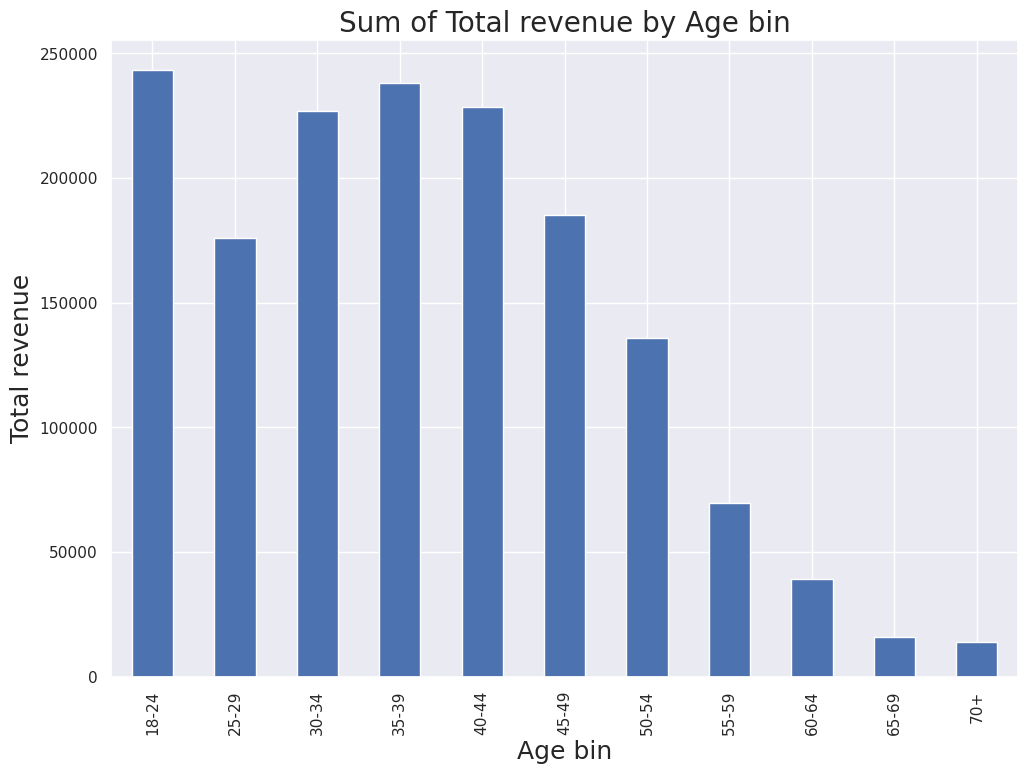

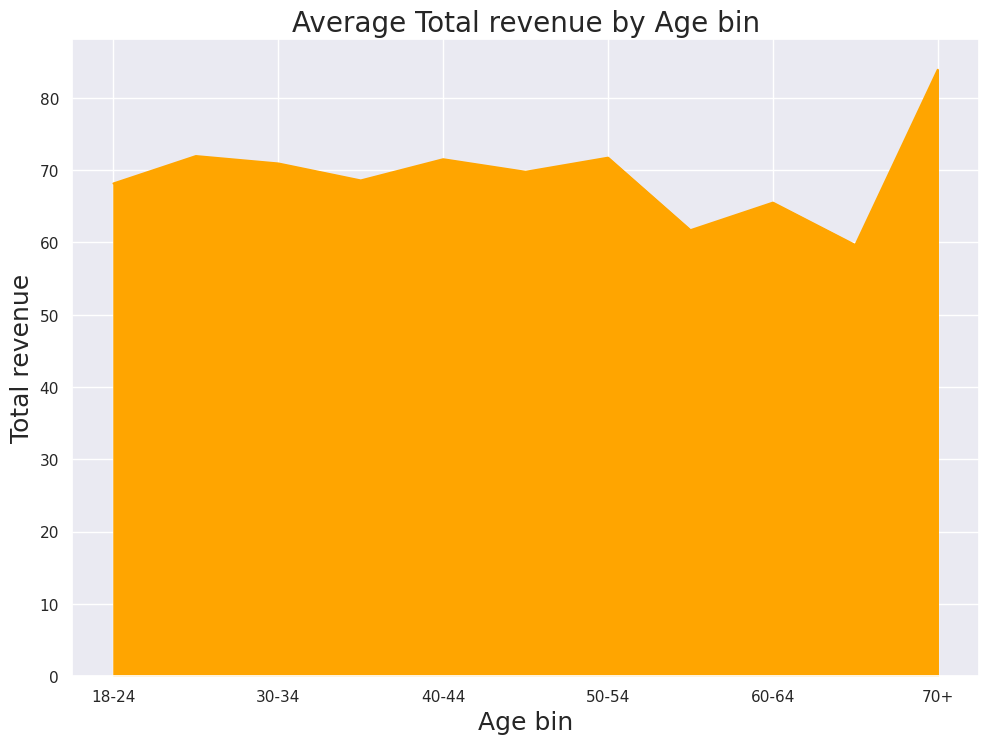

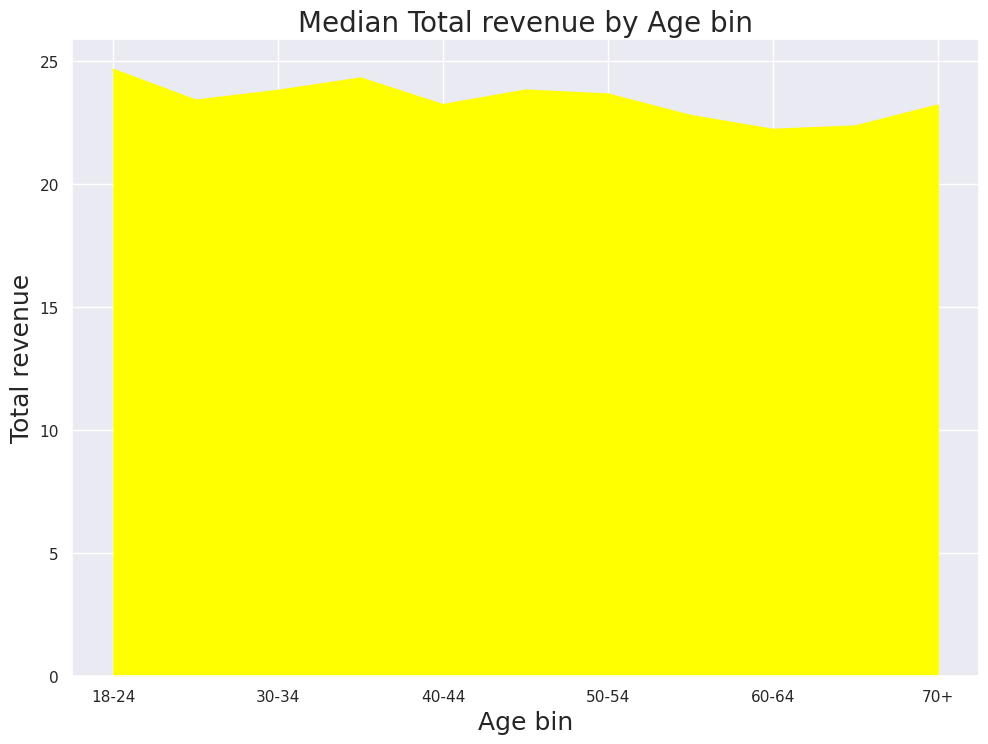

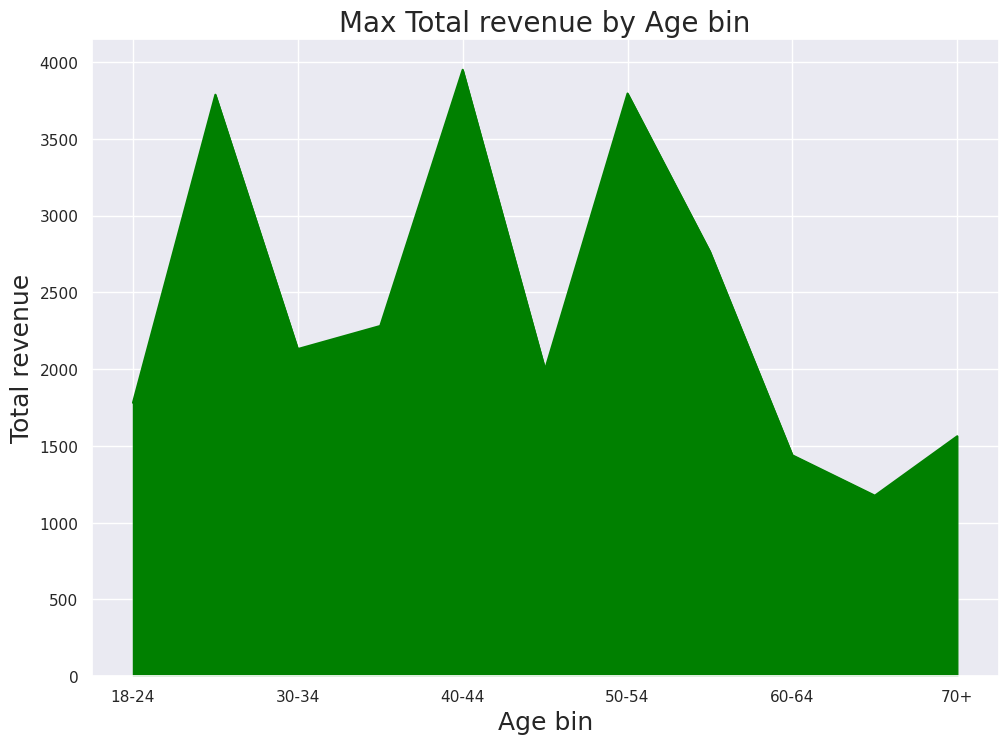

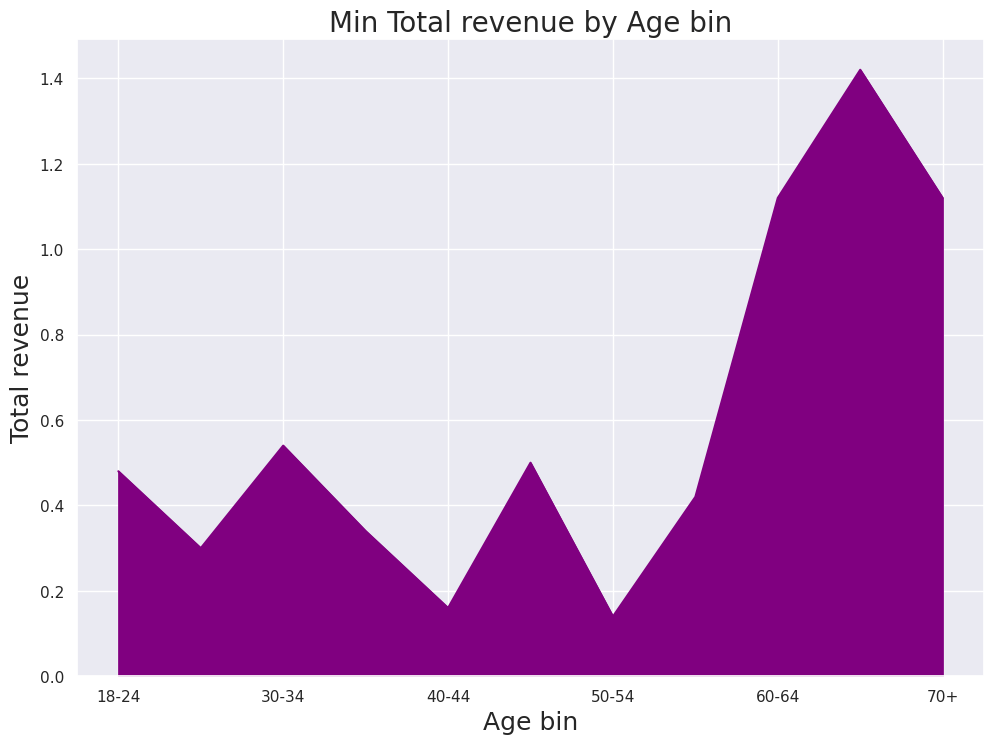

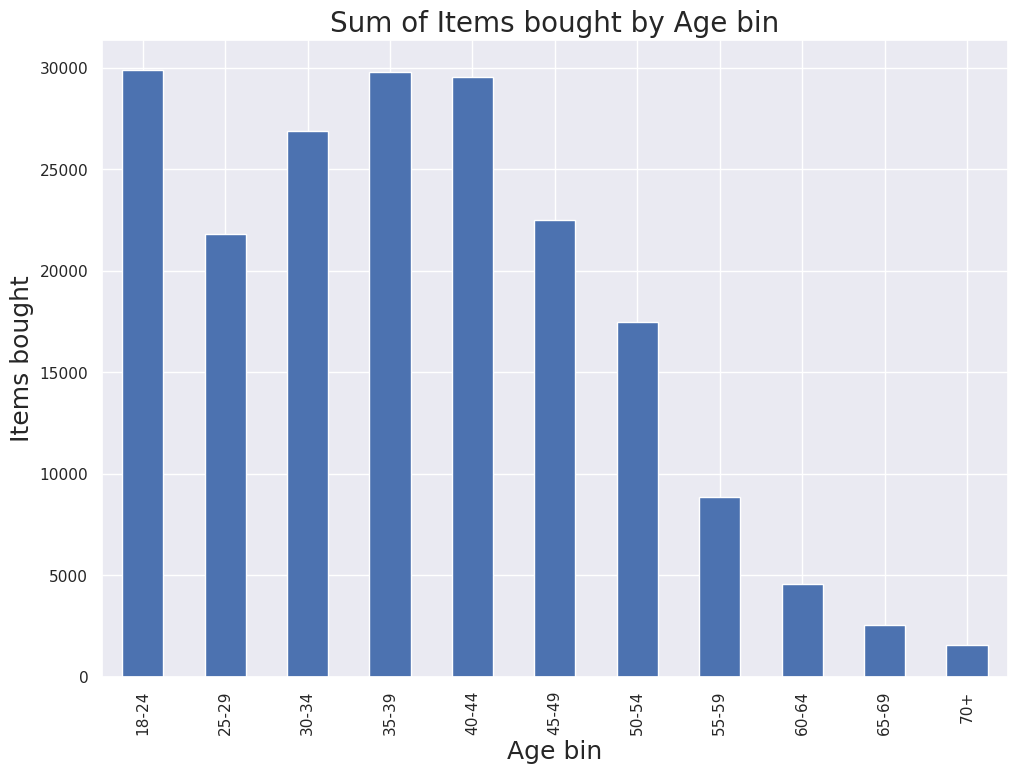

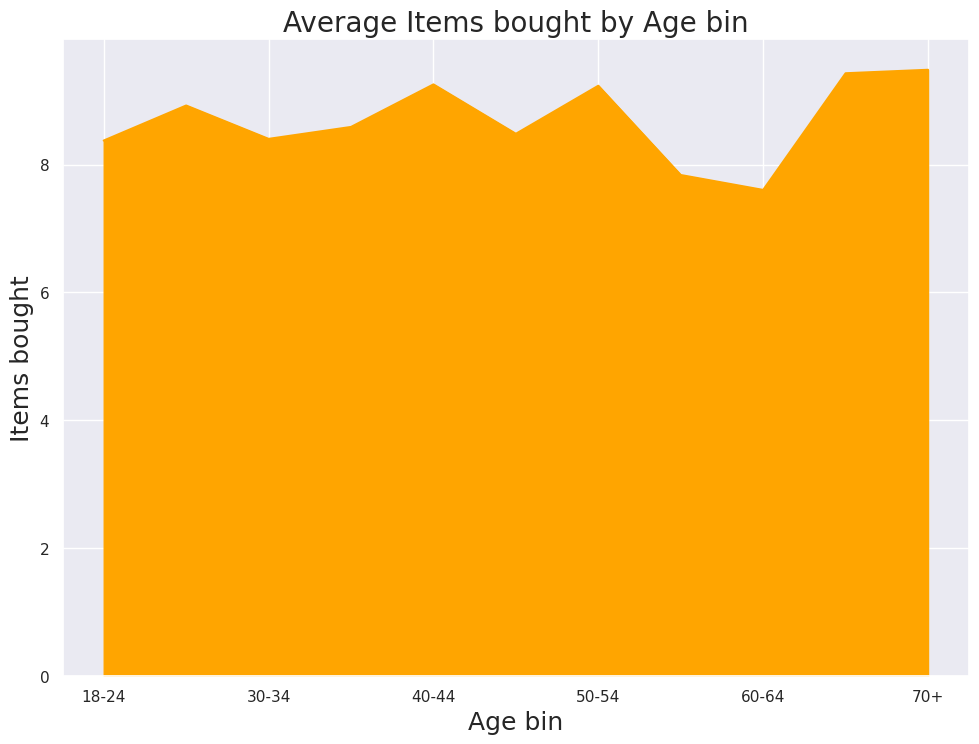

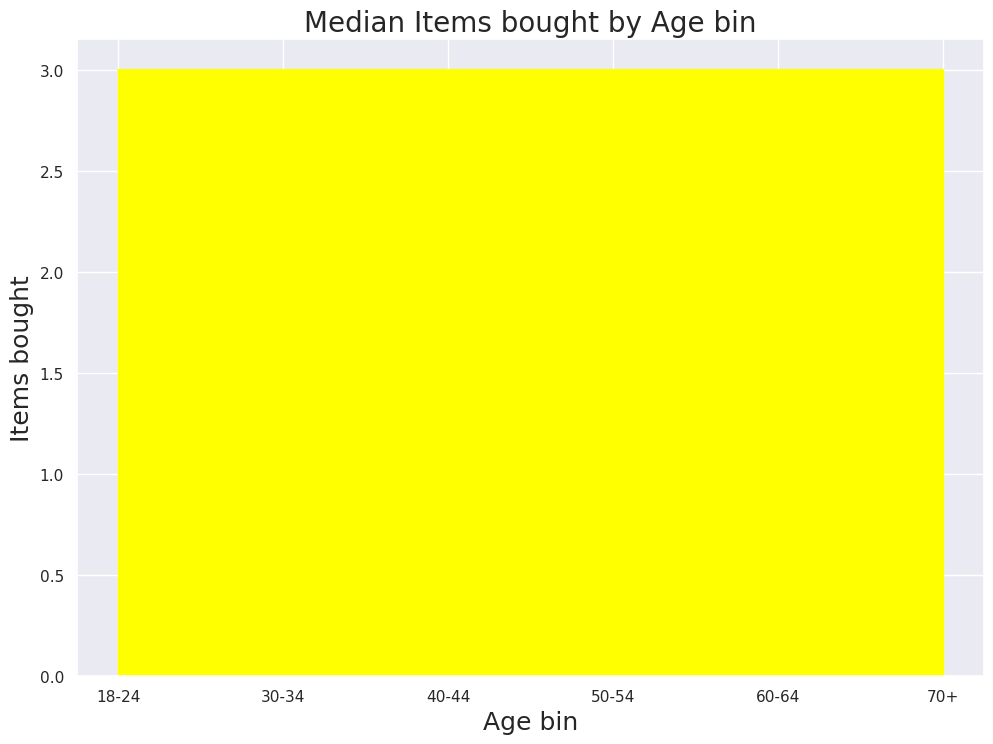

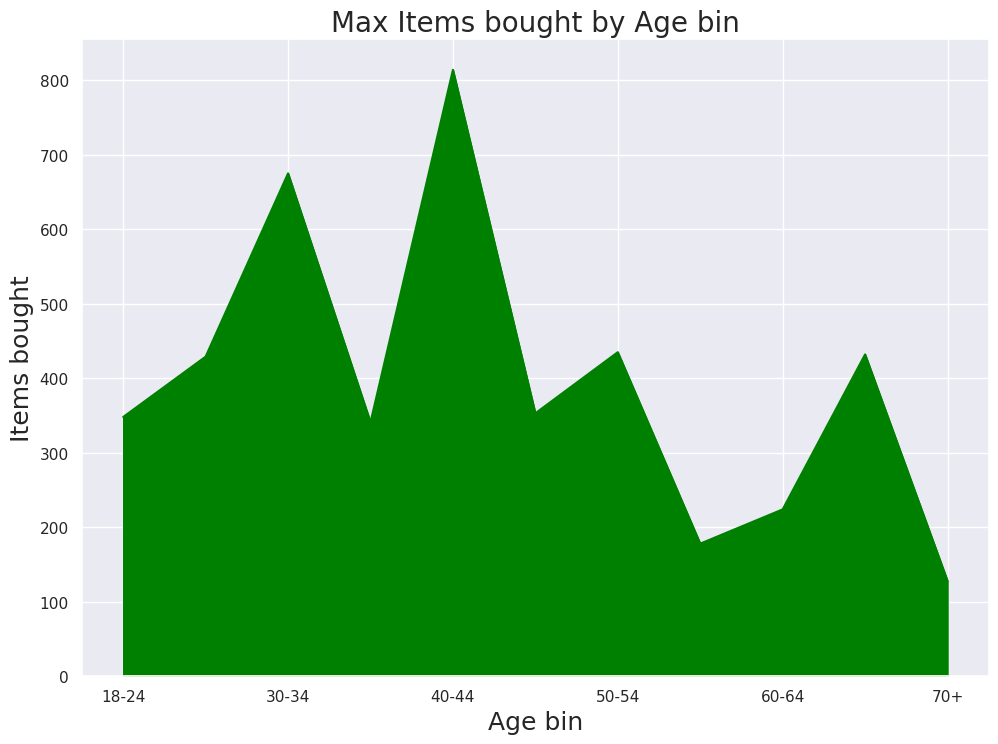

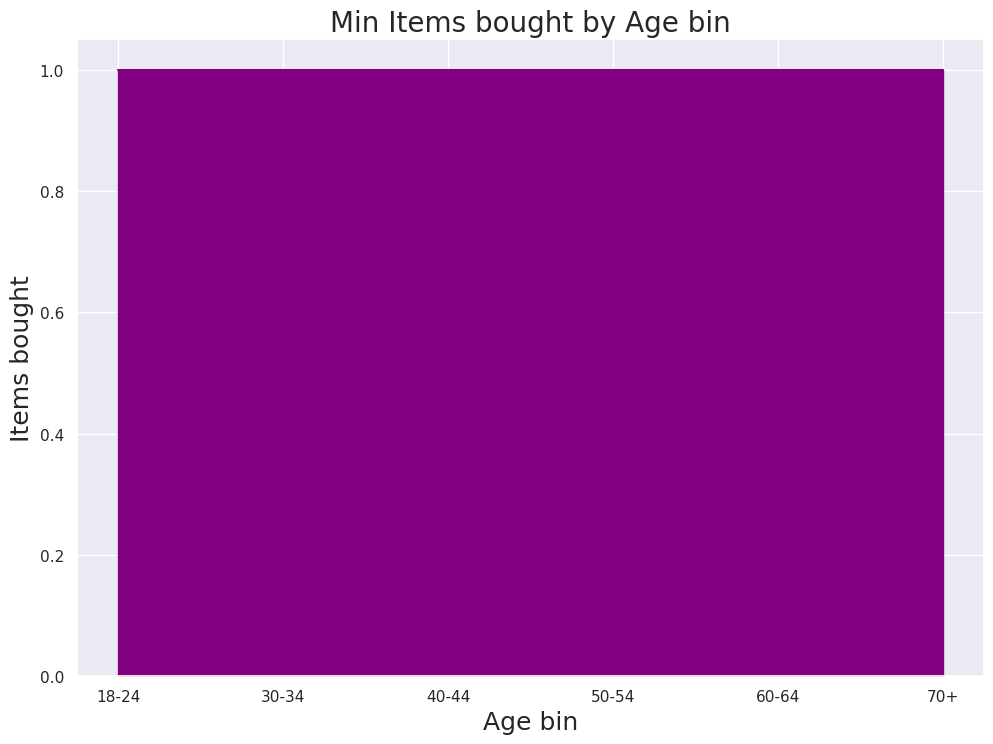

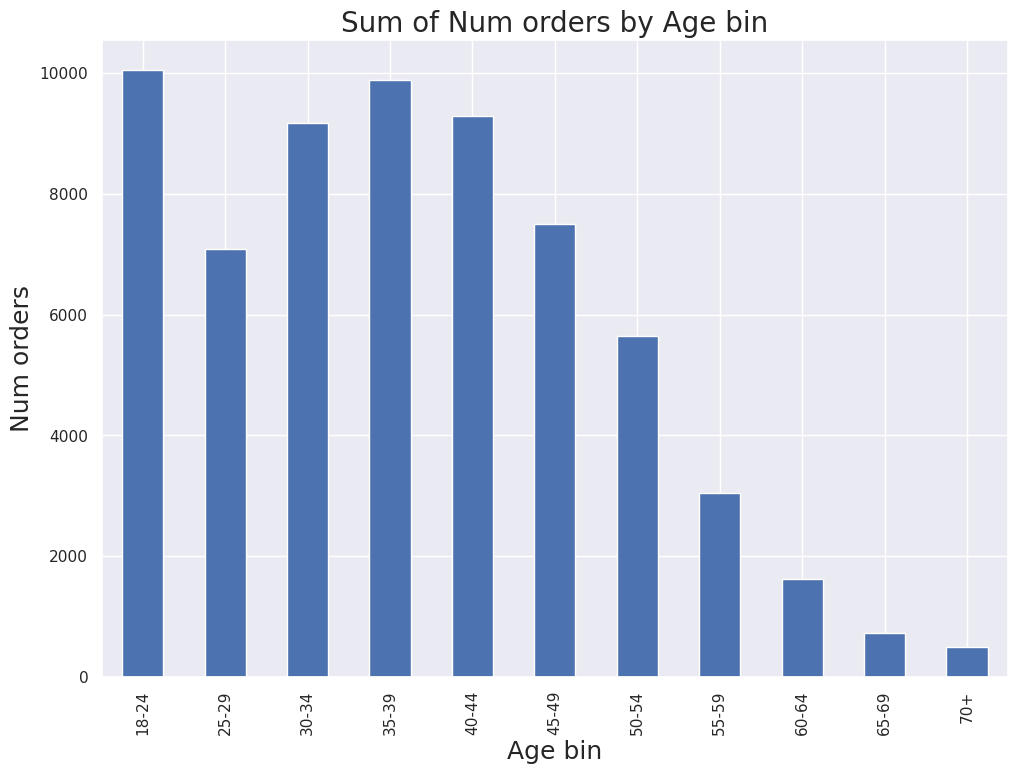

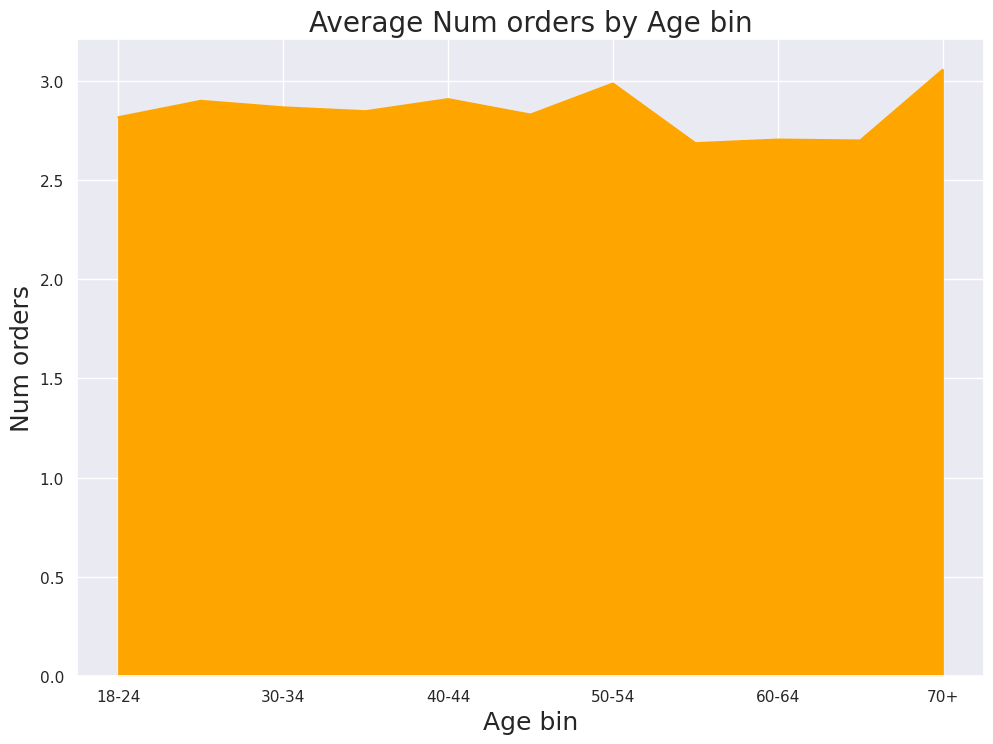

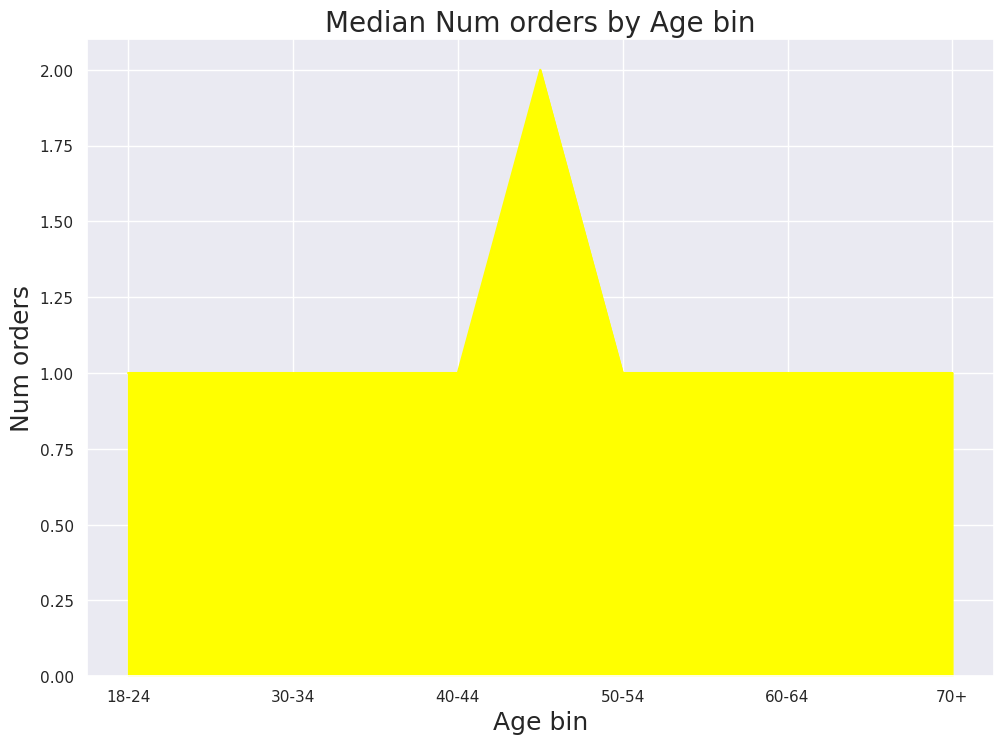

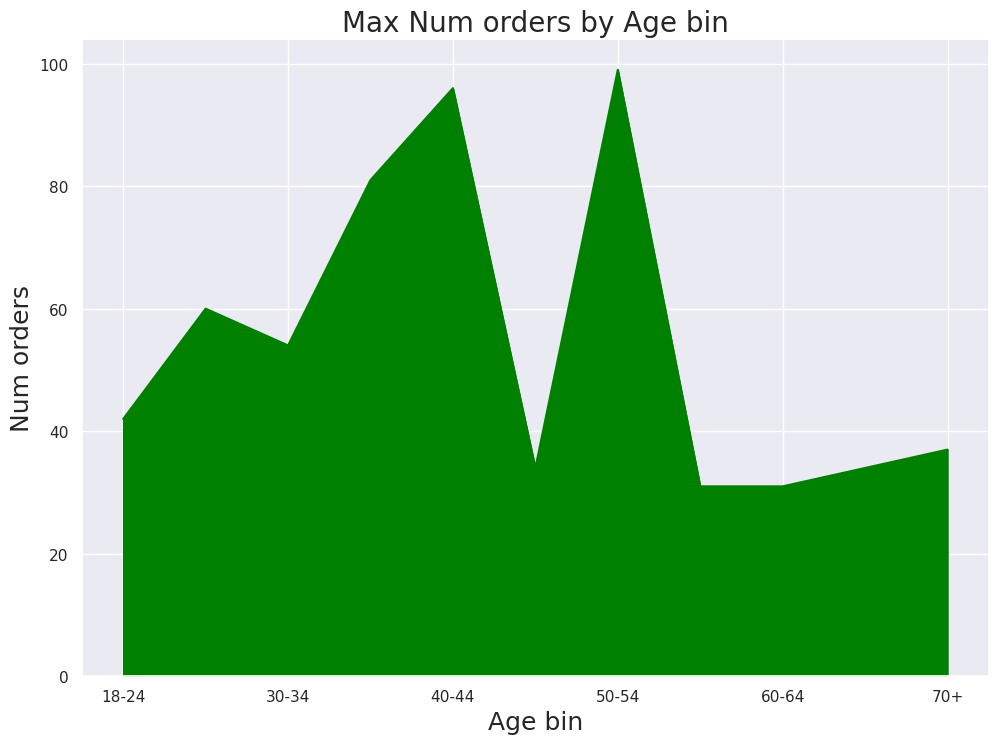

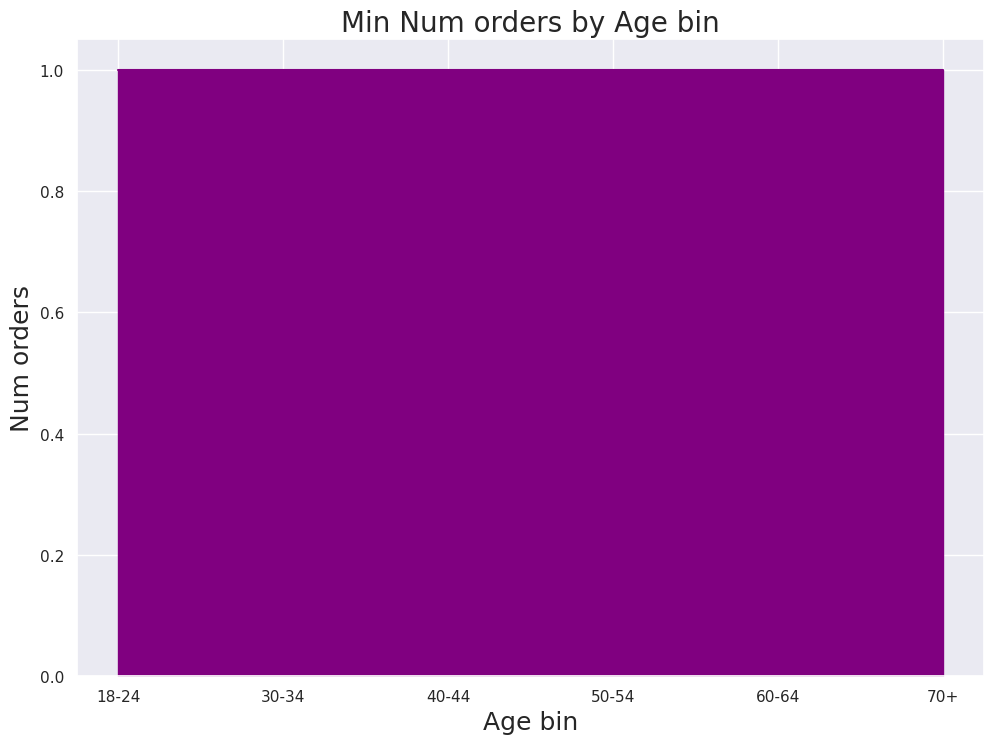

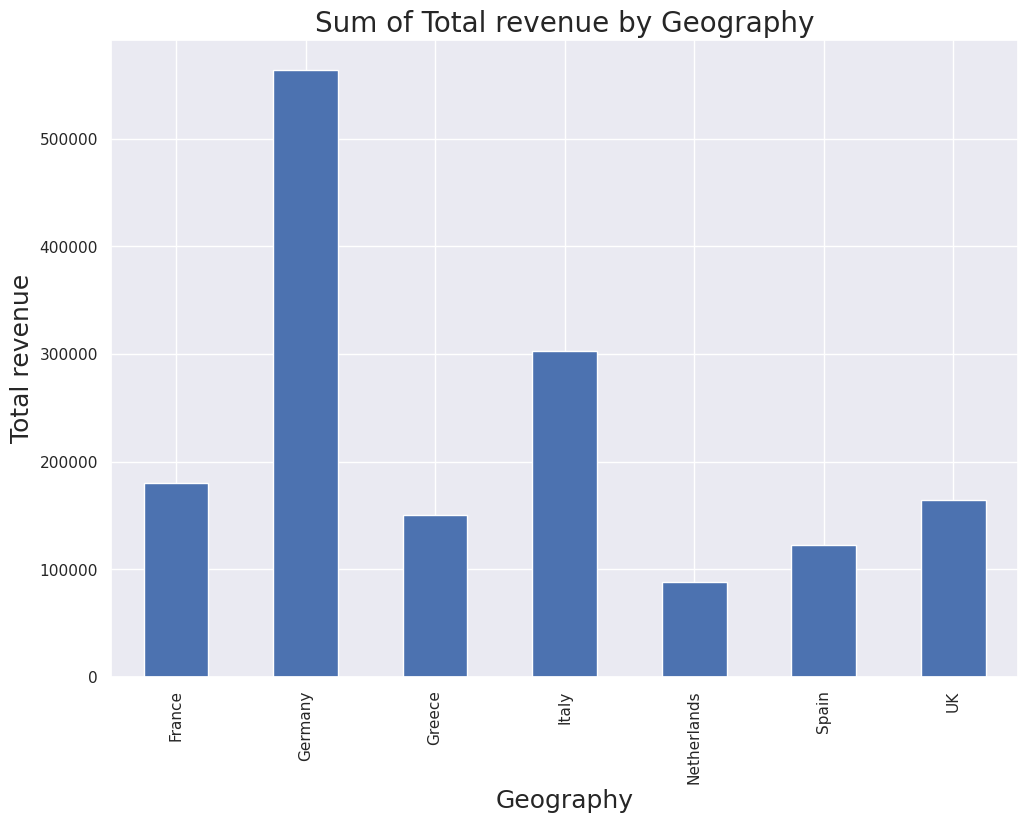

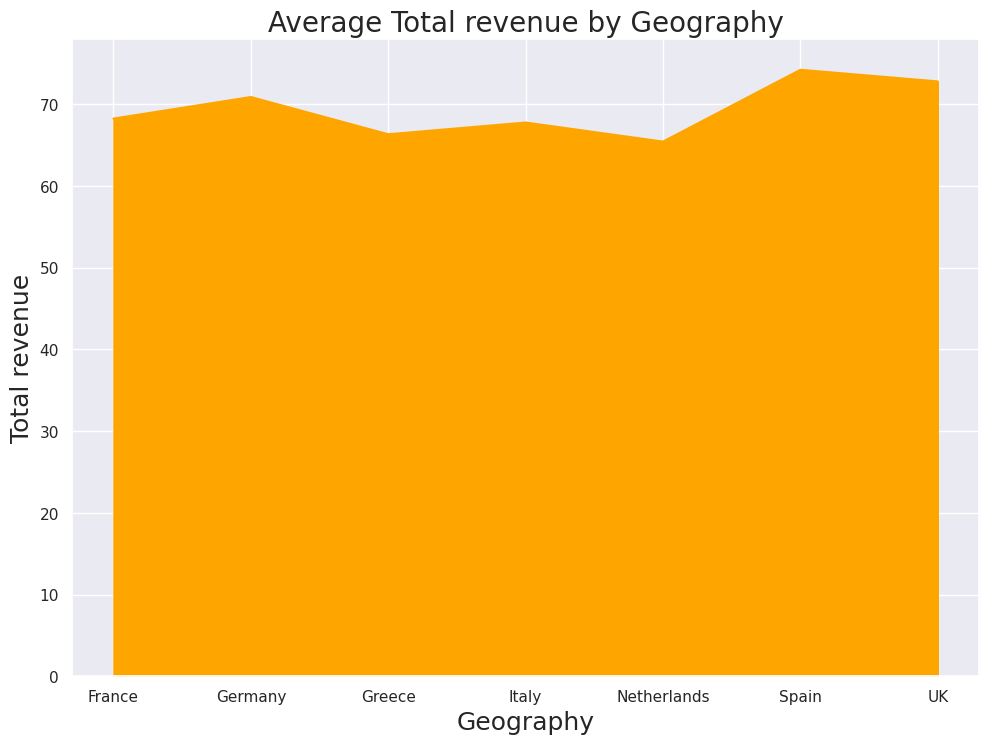

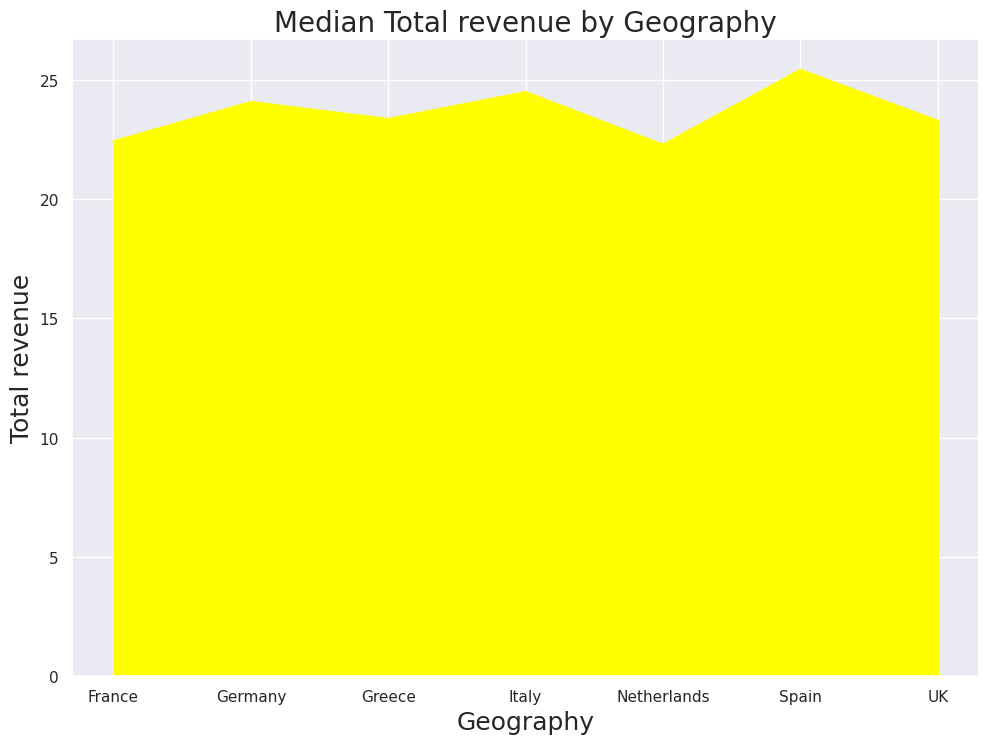

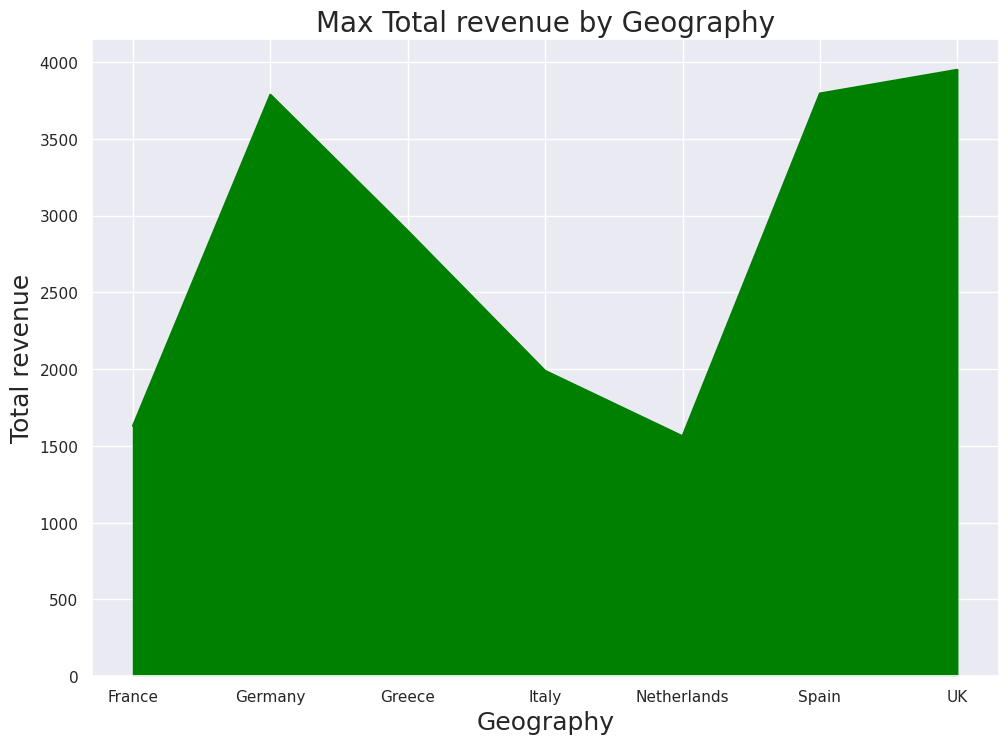

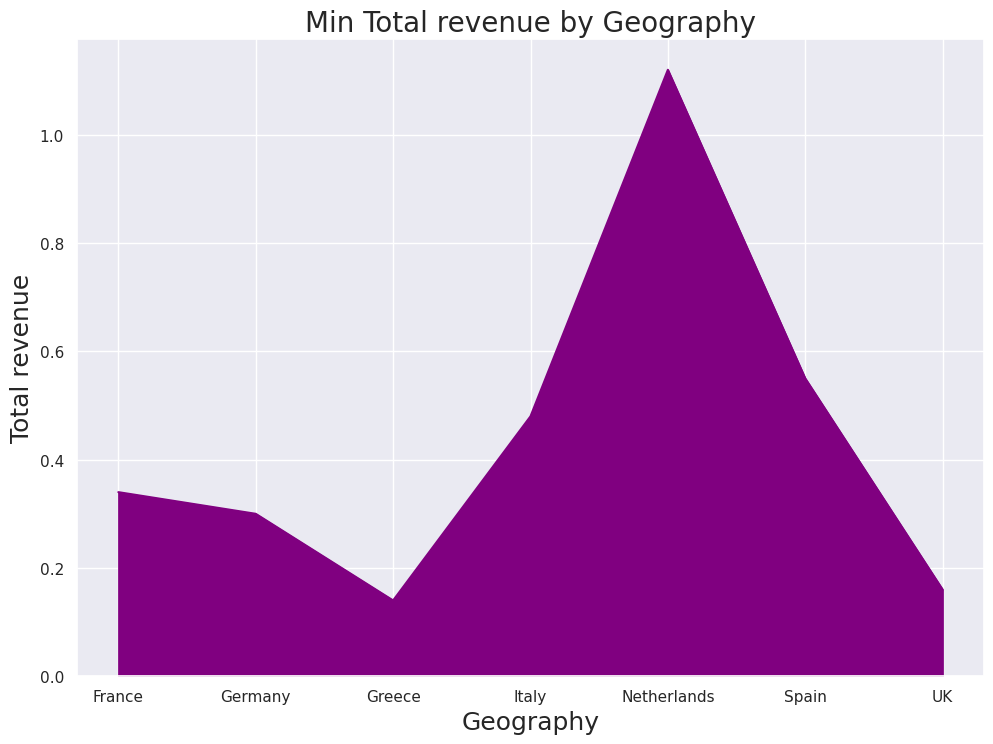

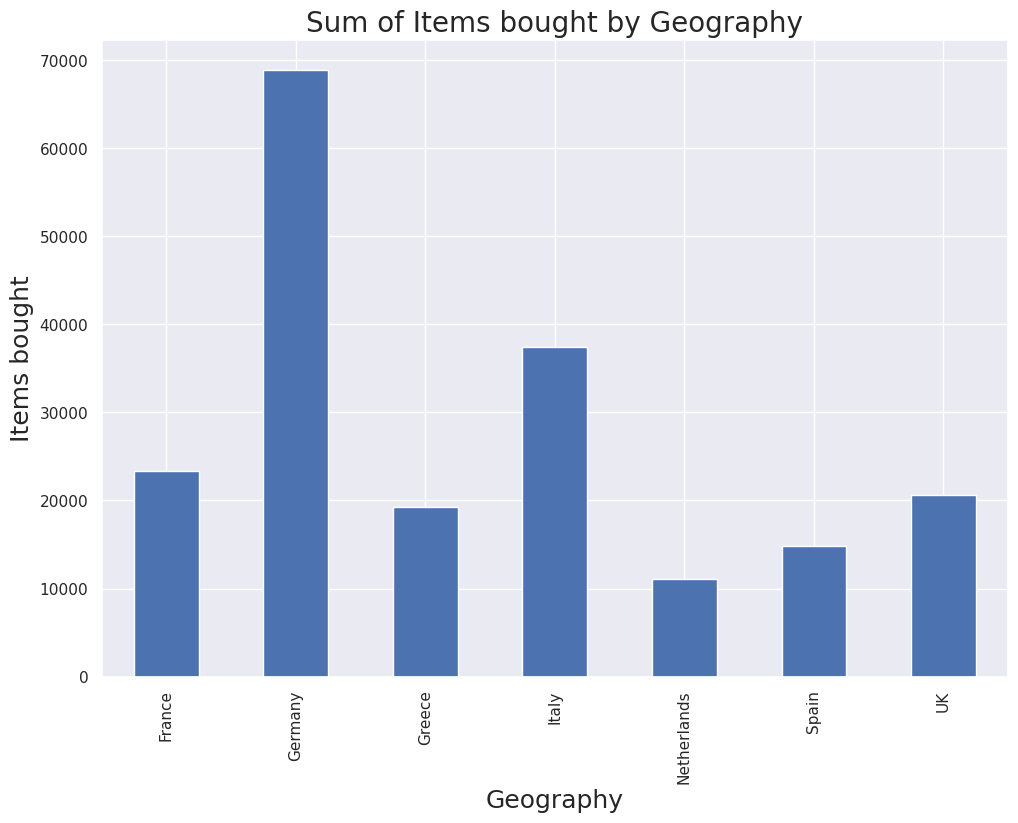

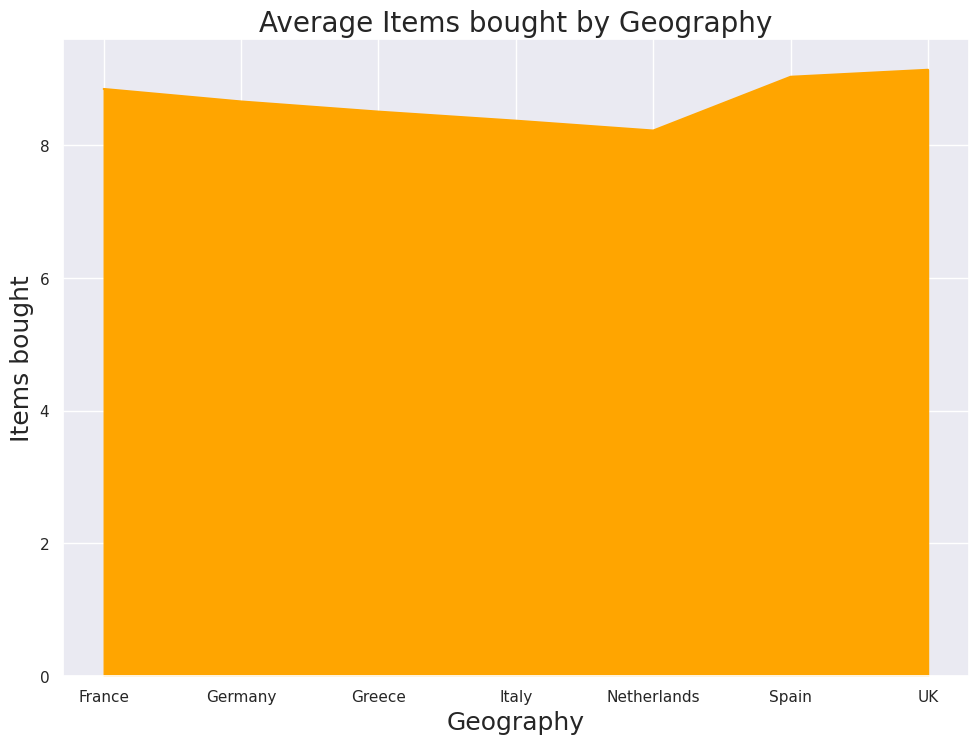

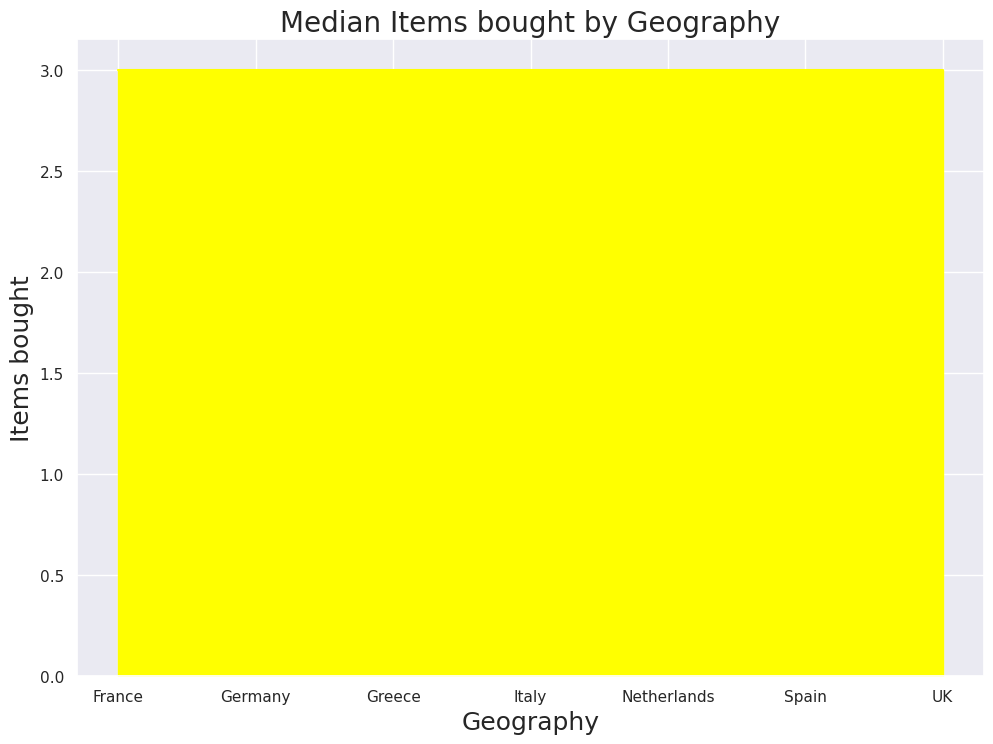

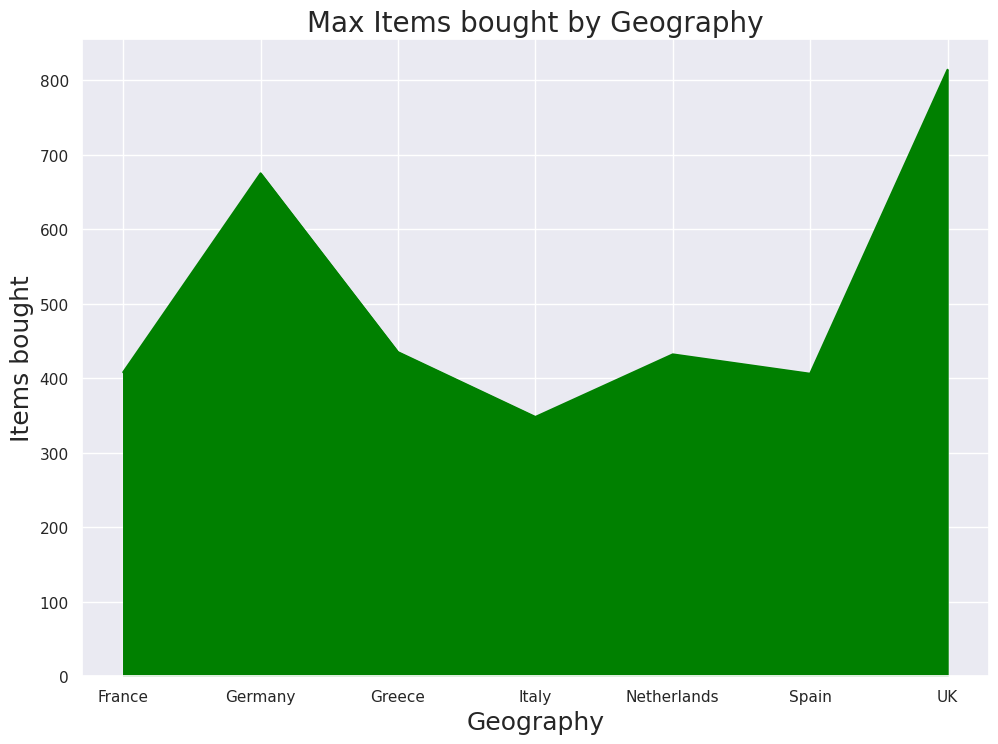

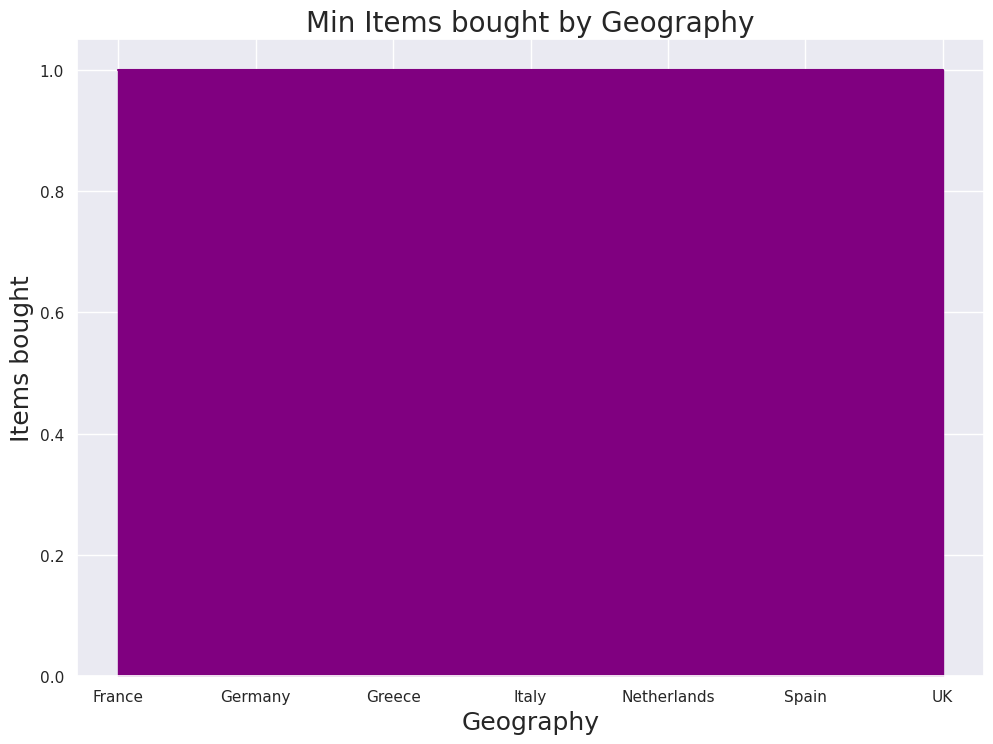

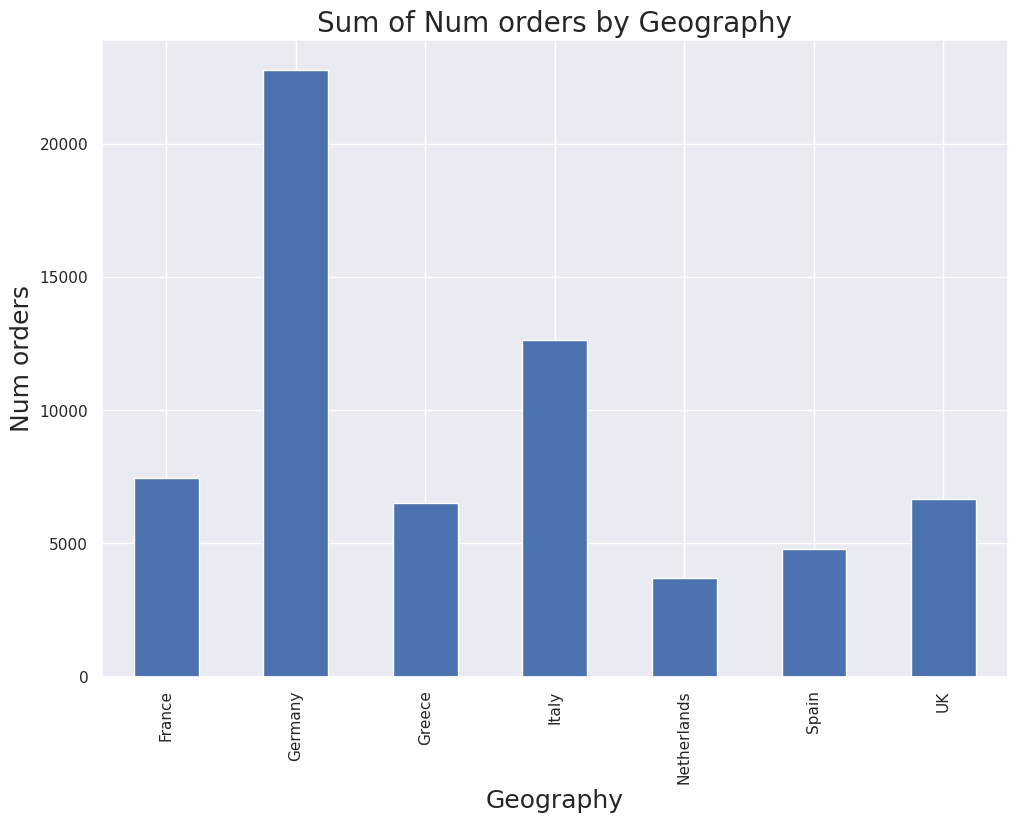

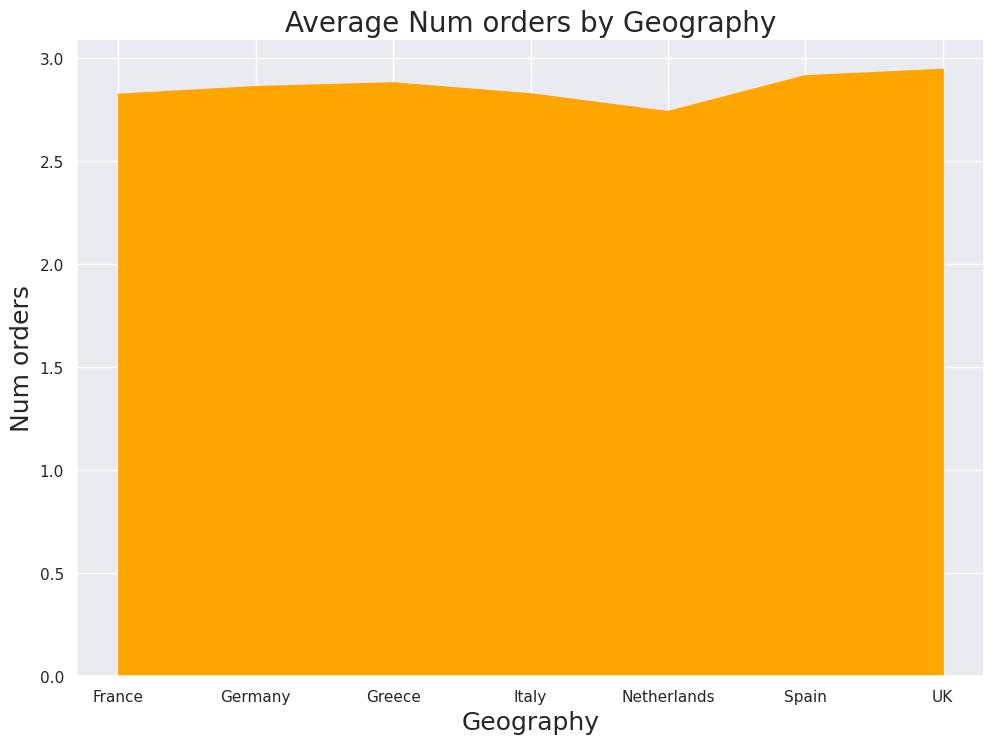

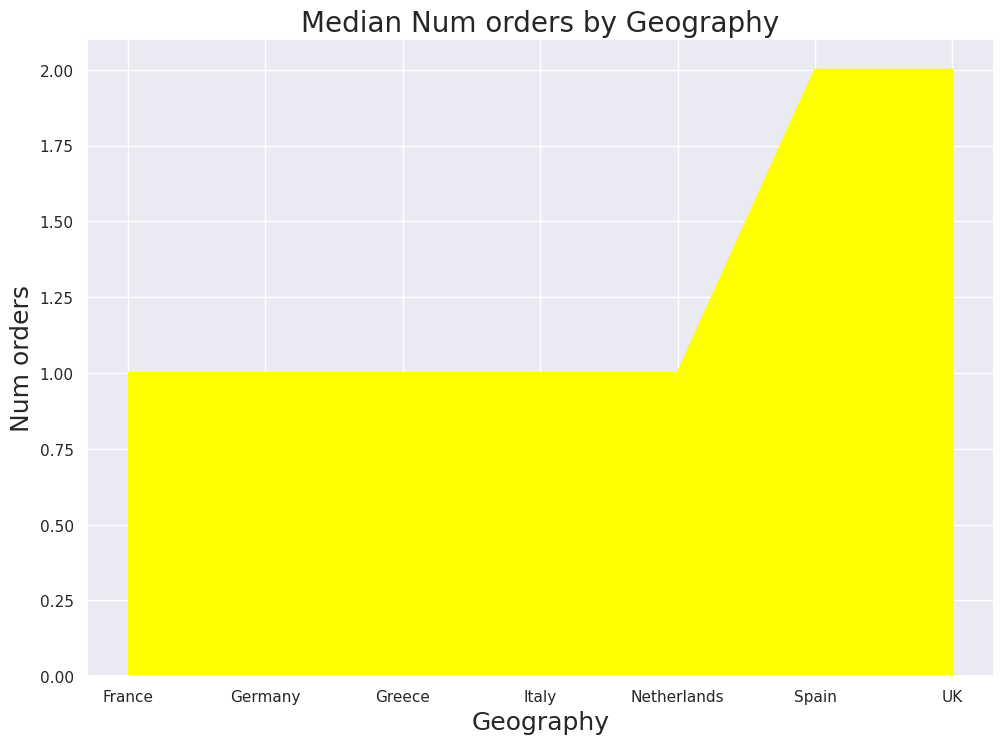

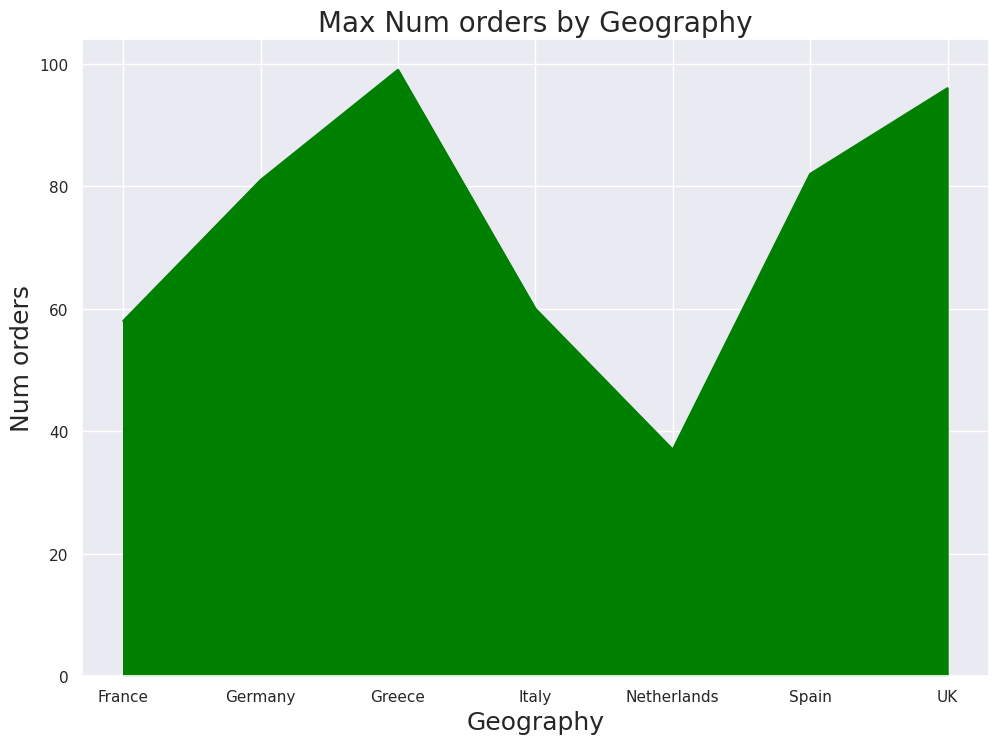

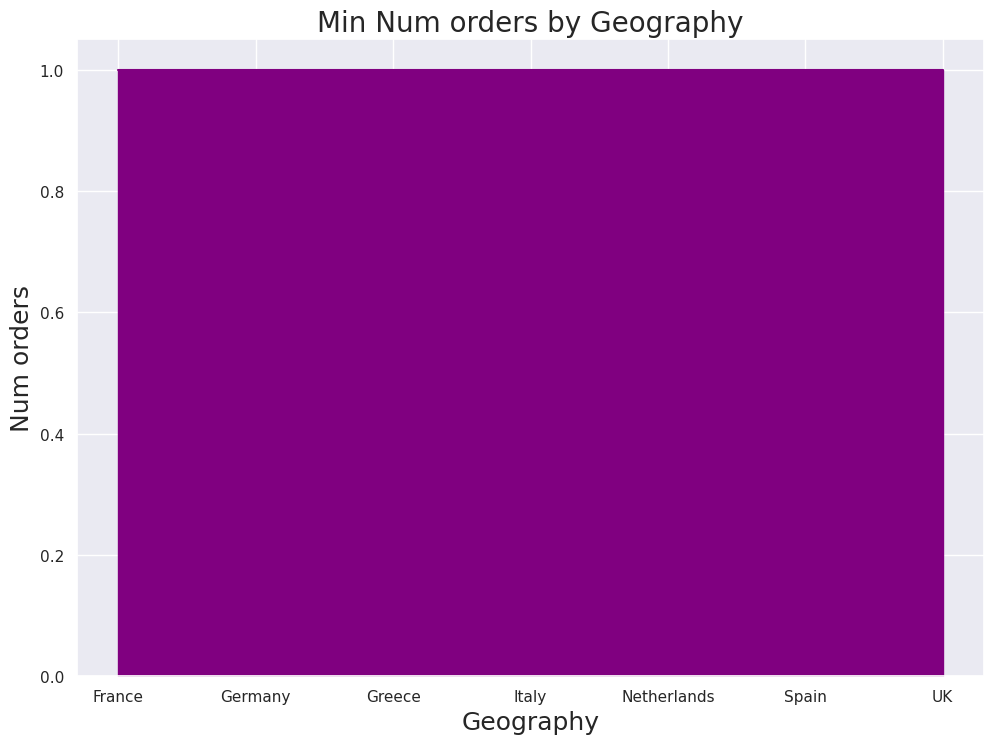

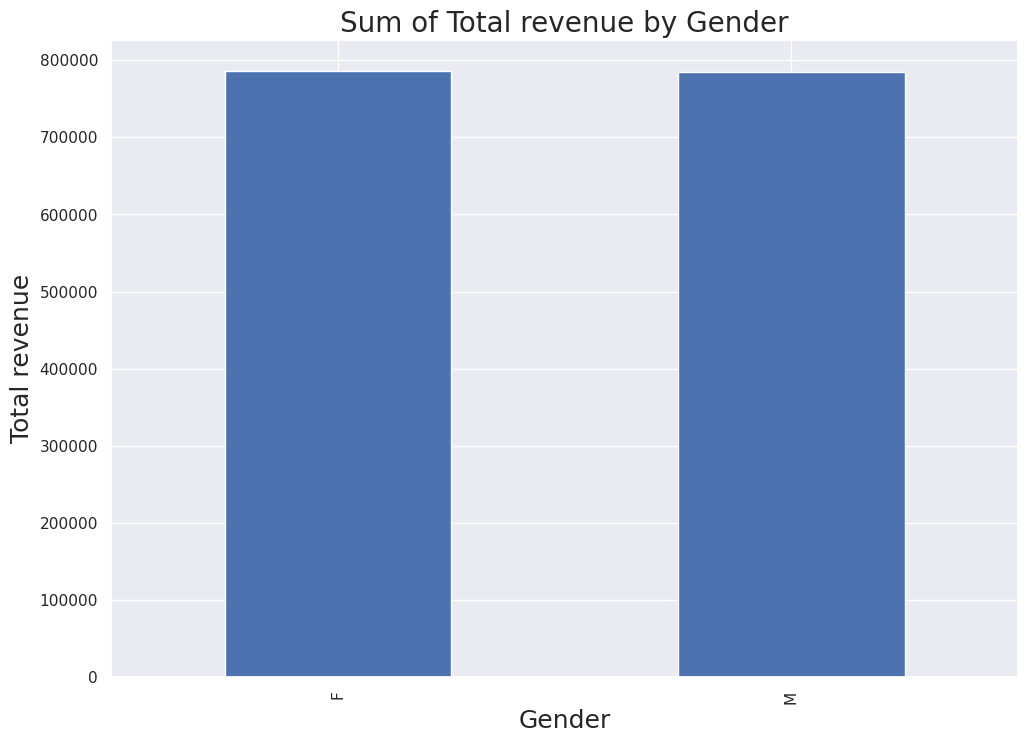

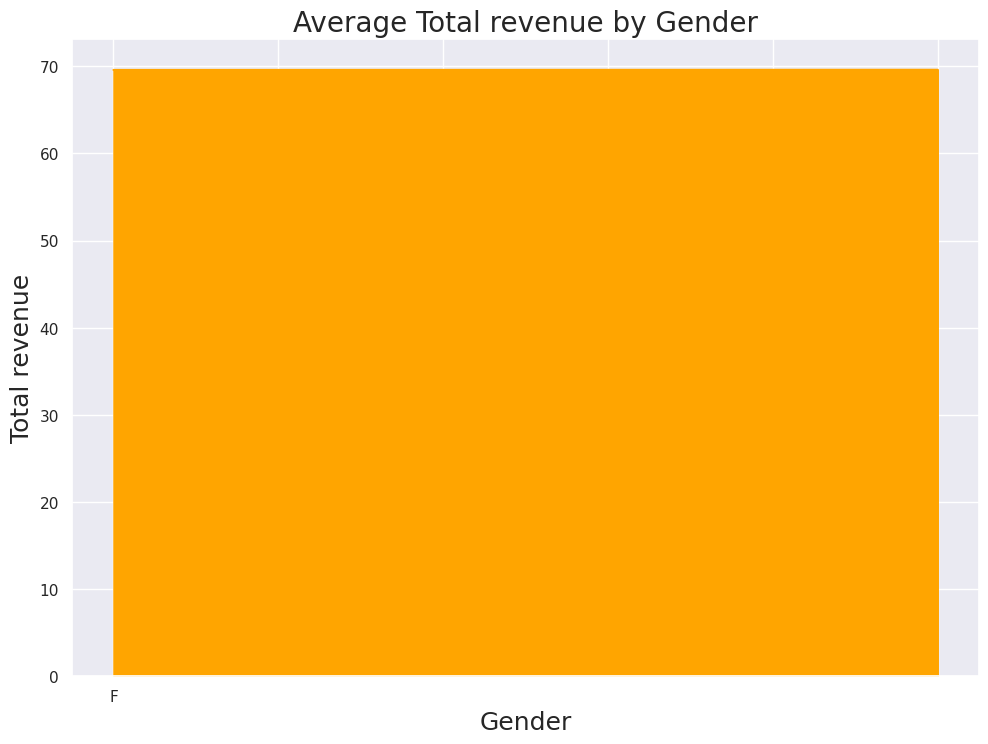

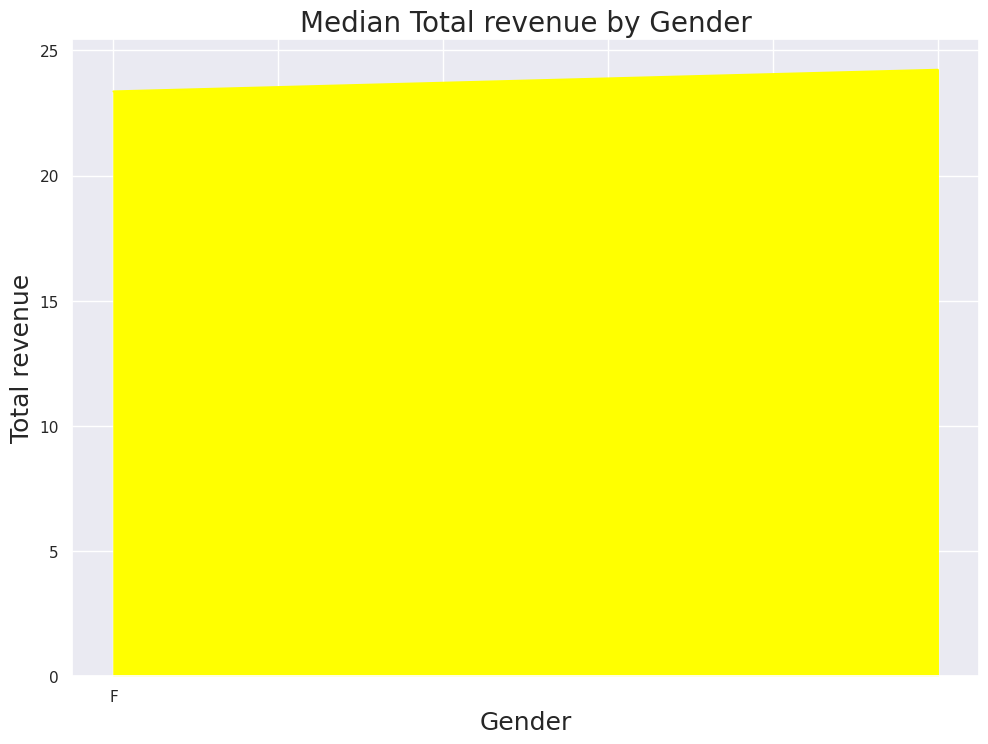

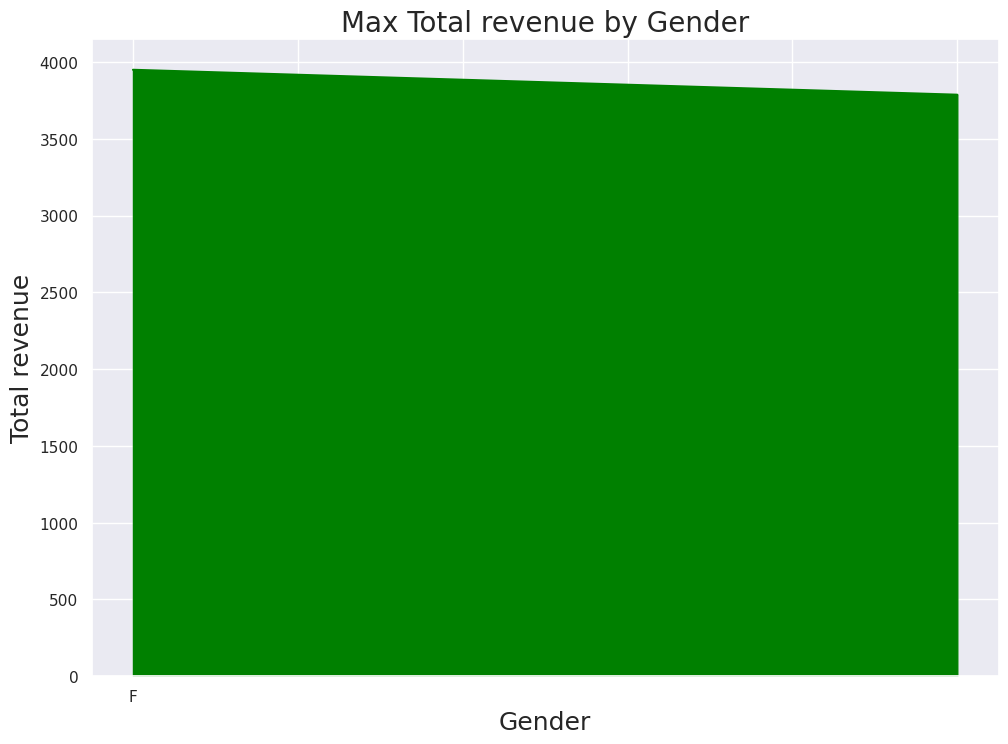

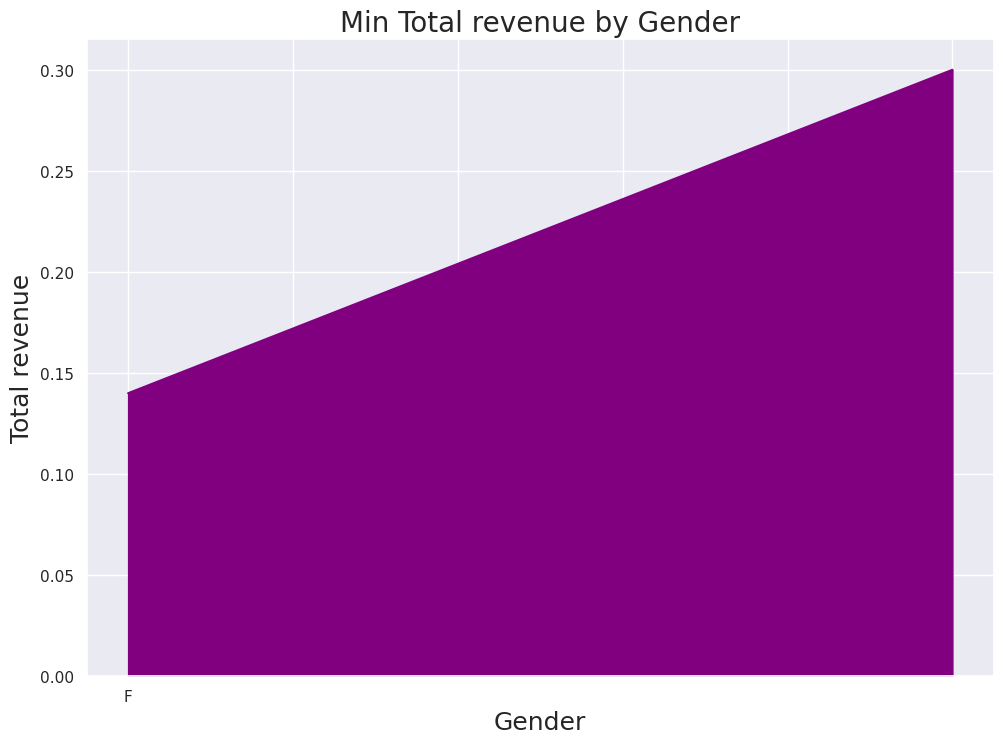

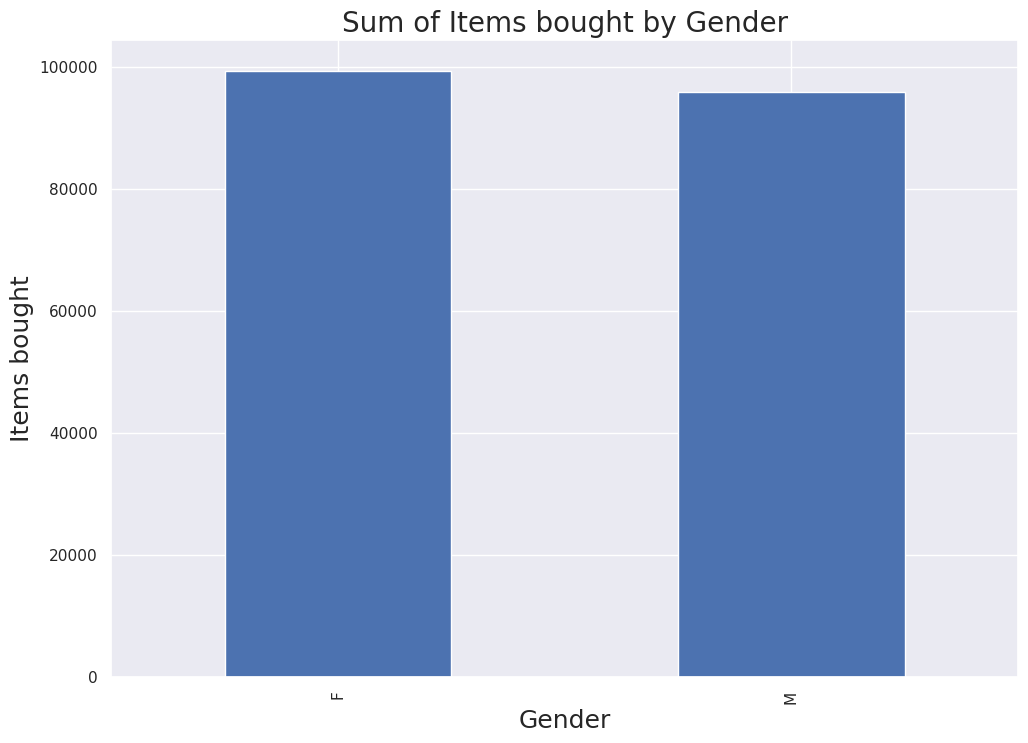

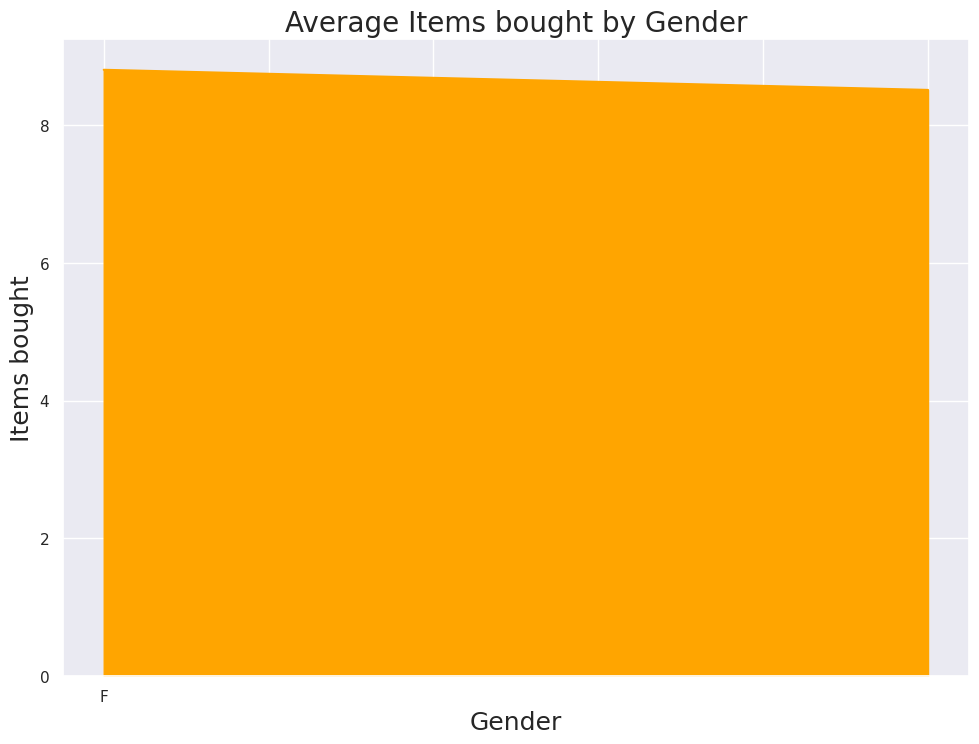

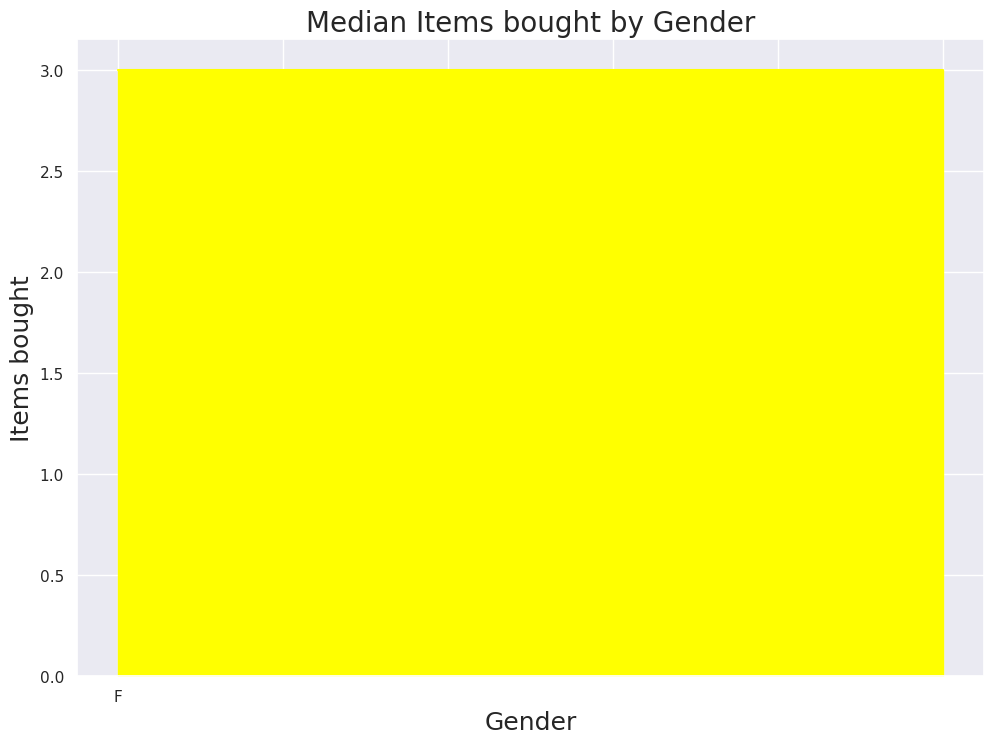

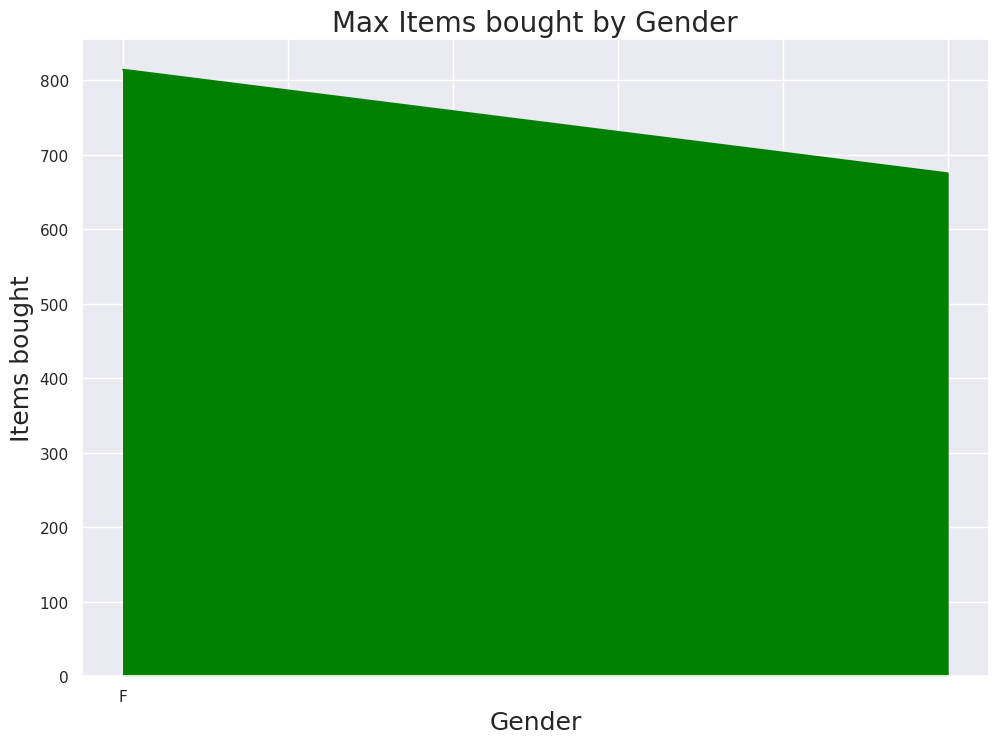

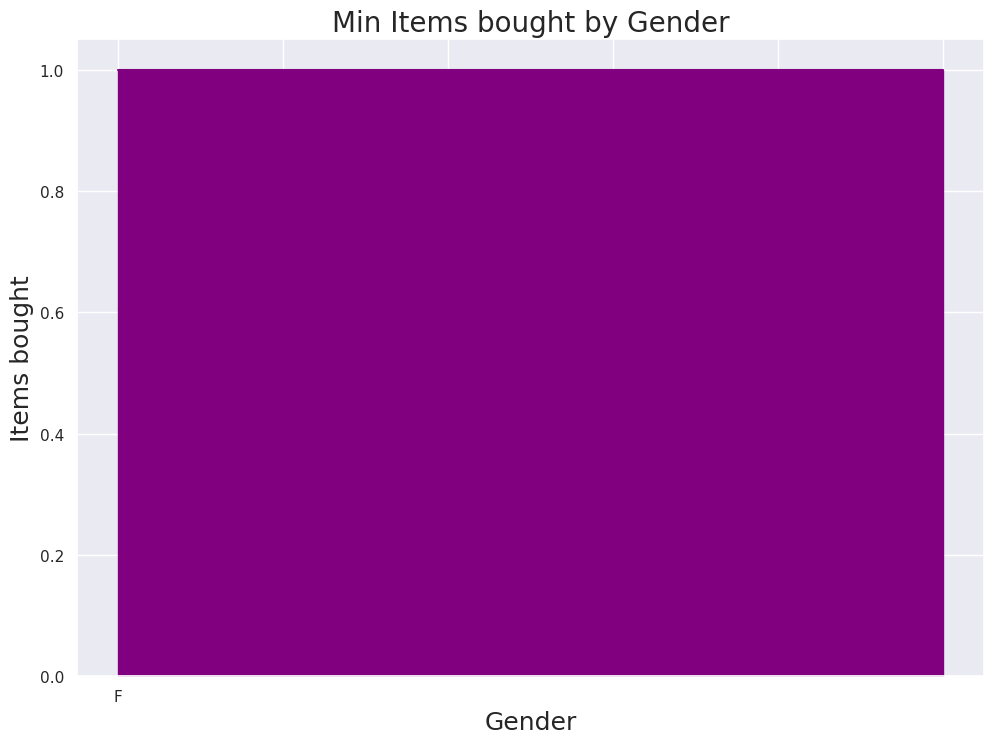

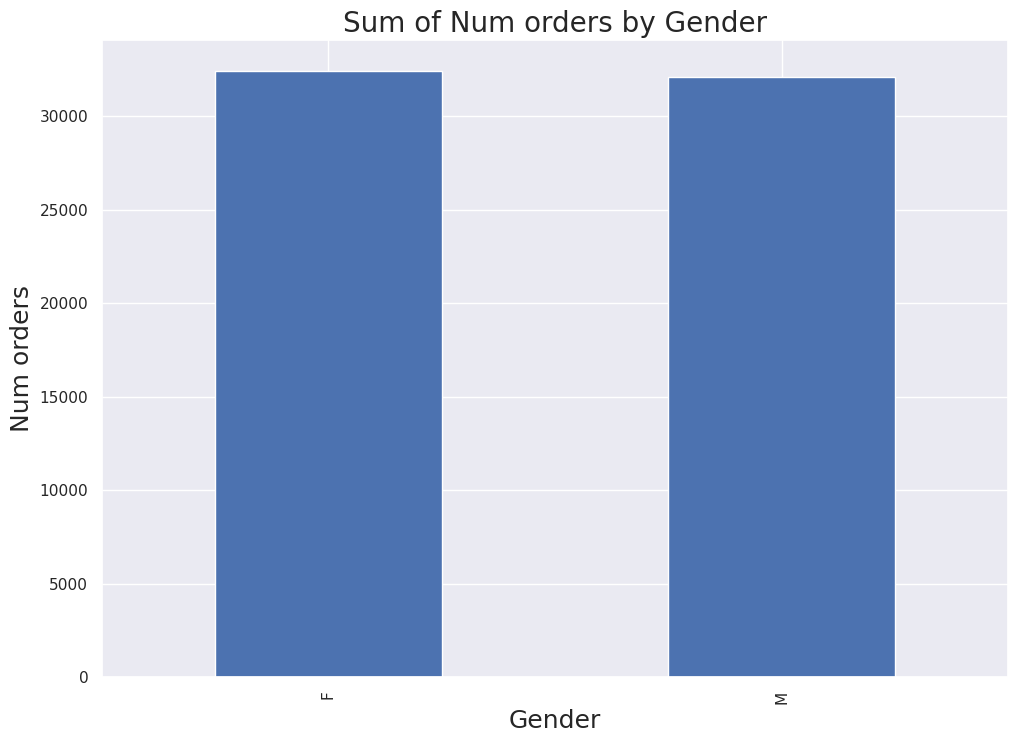

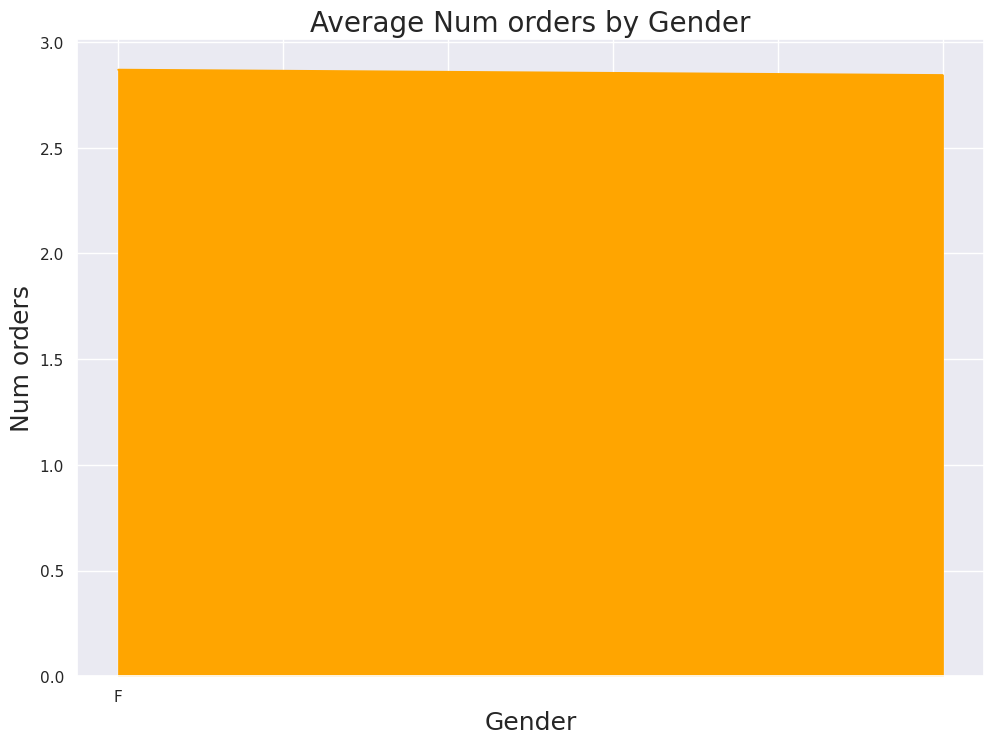

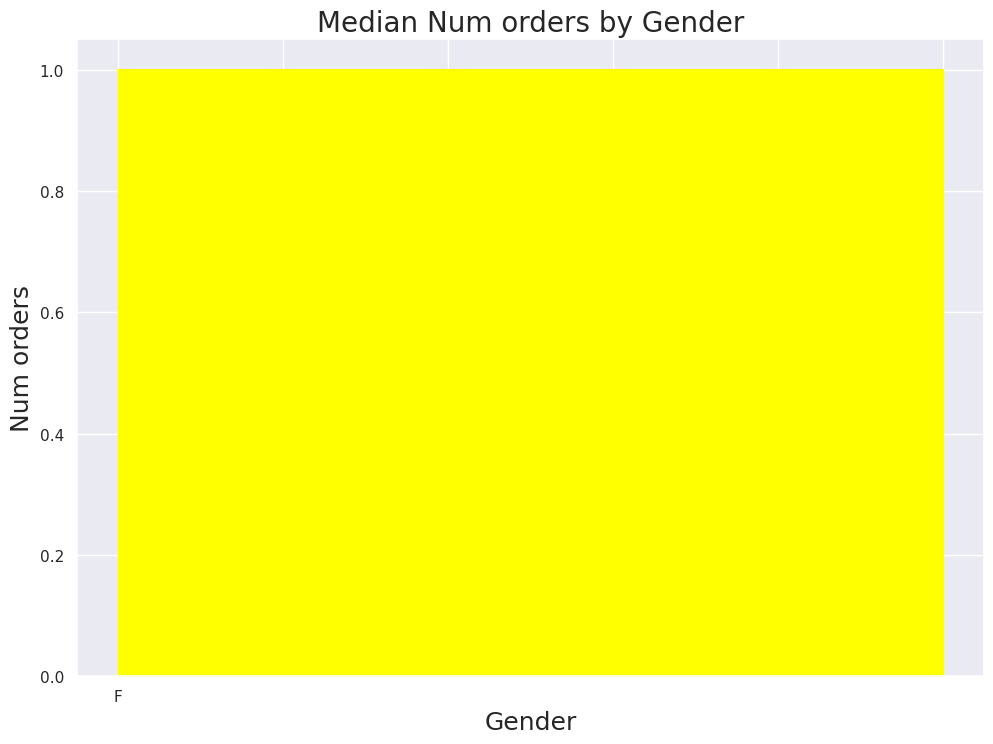

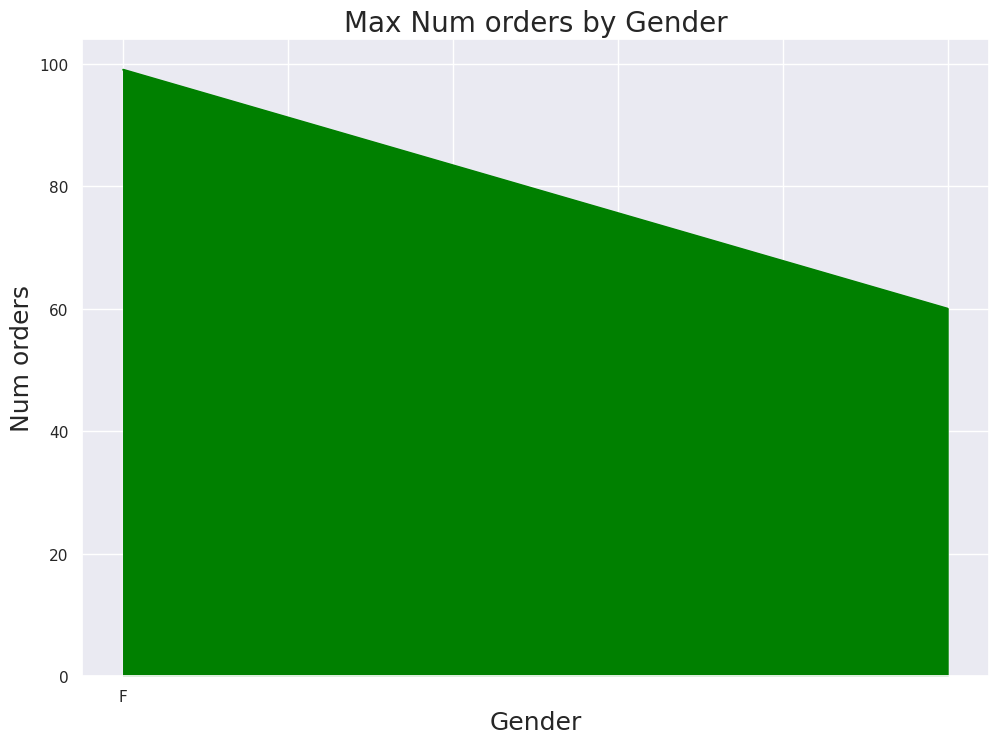

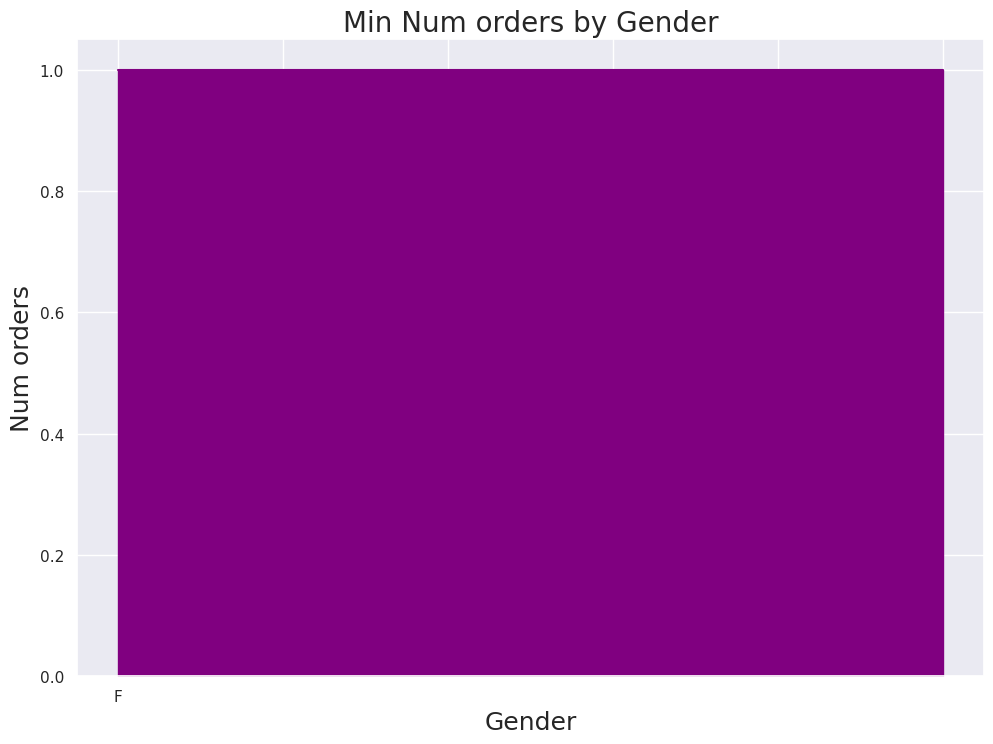

In [96]:
plot_statistical_data(customers_df, ['age_bin','GEOGRAPHY', 'GENDER'], sum_cols)

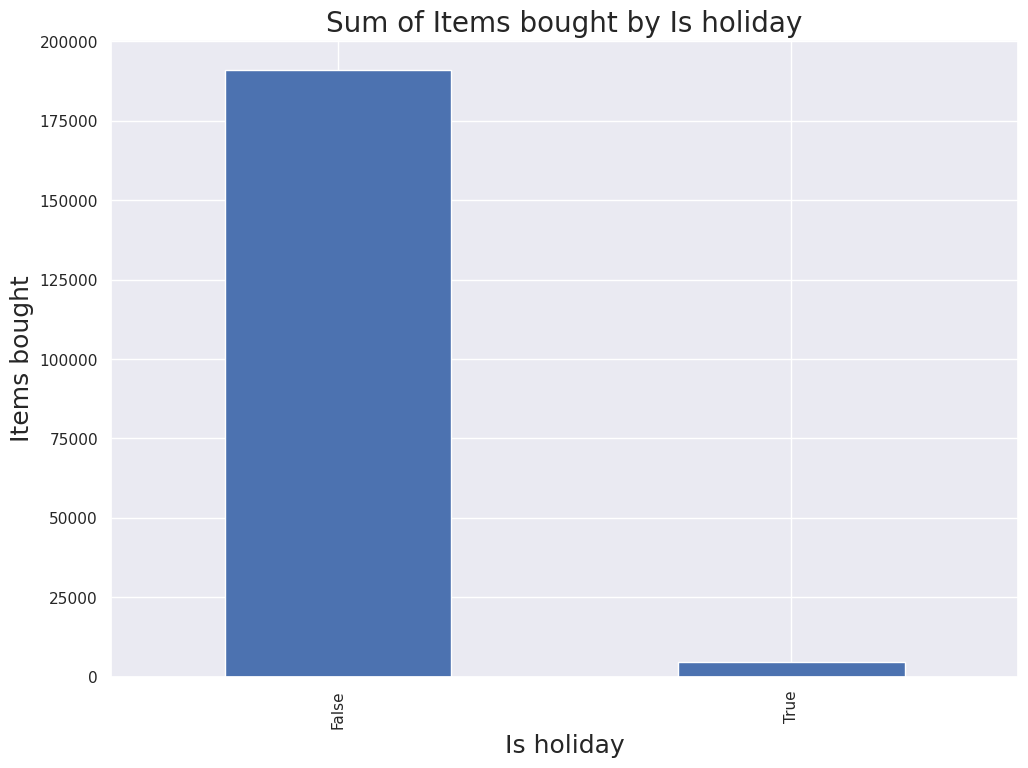

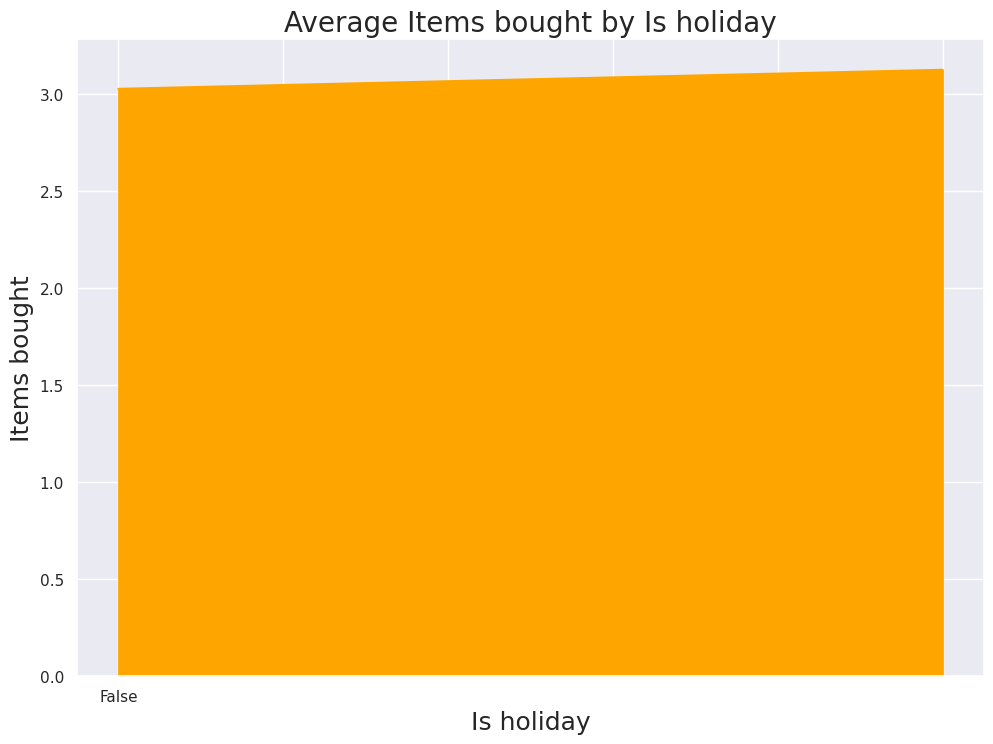

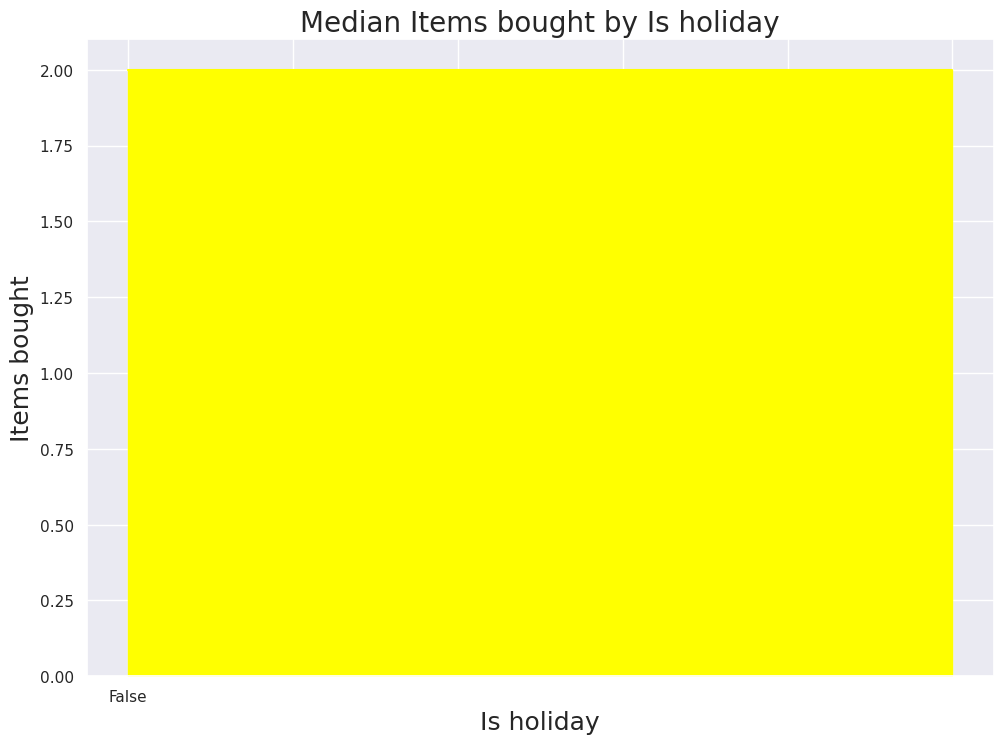

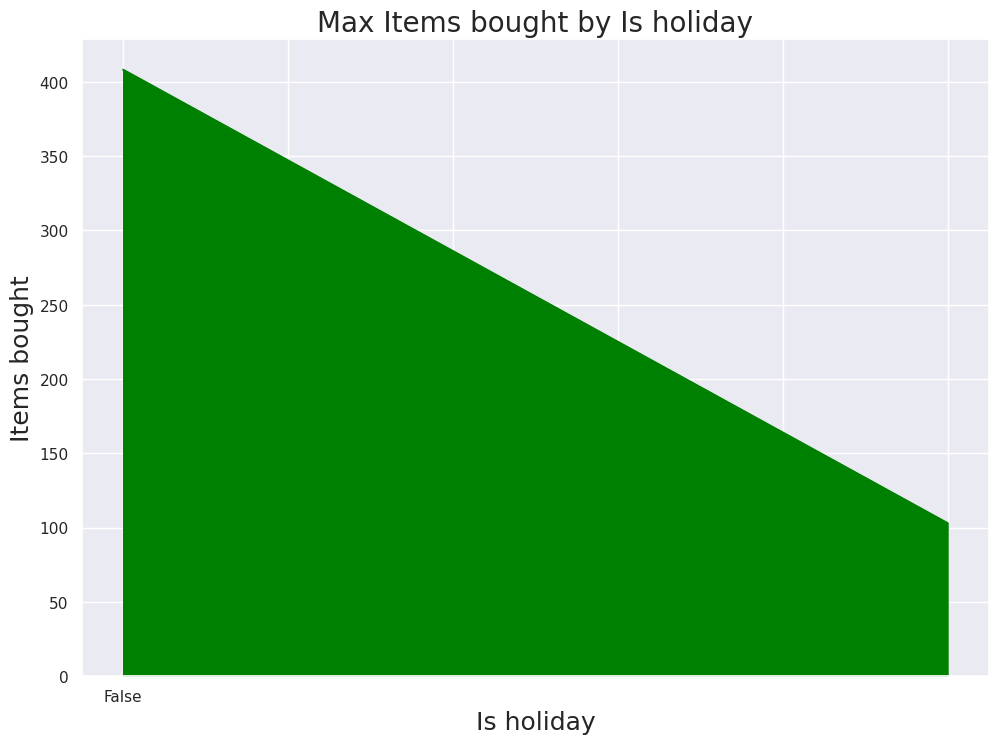

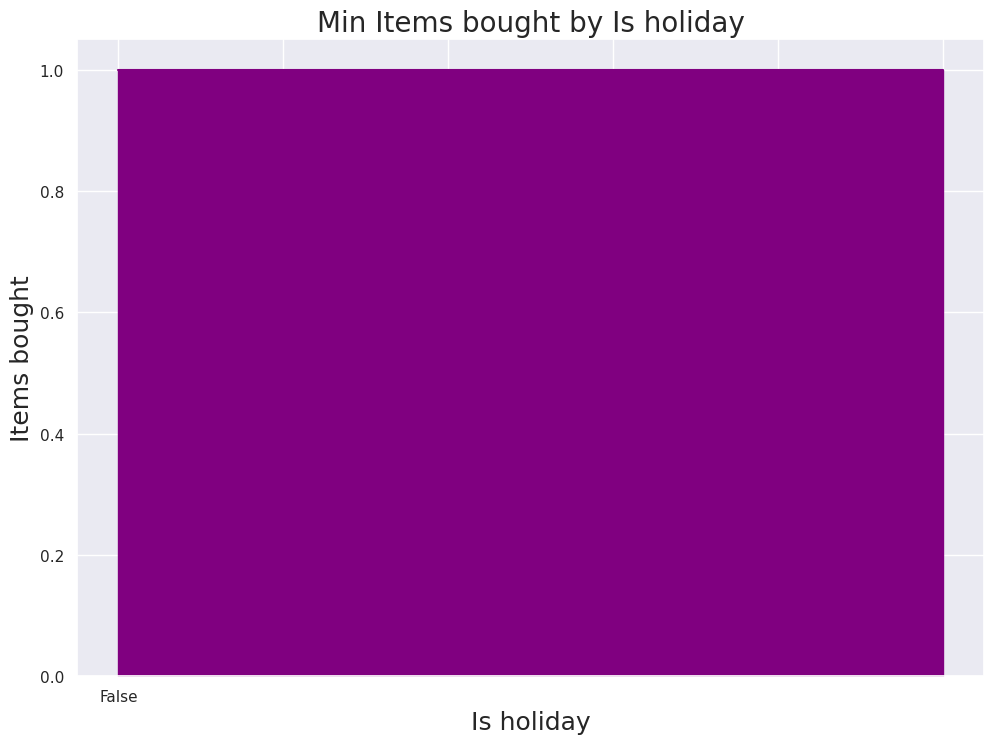

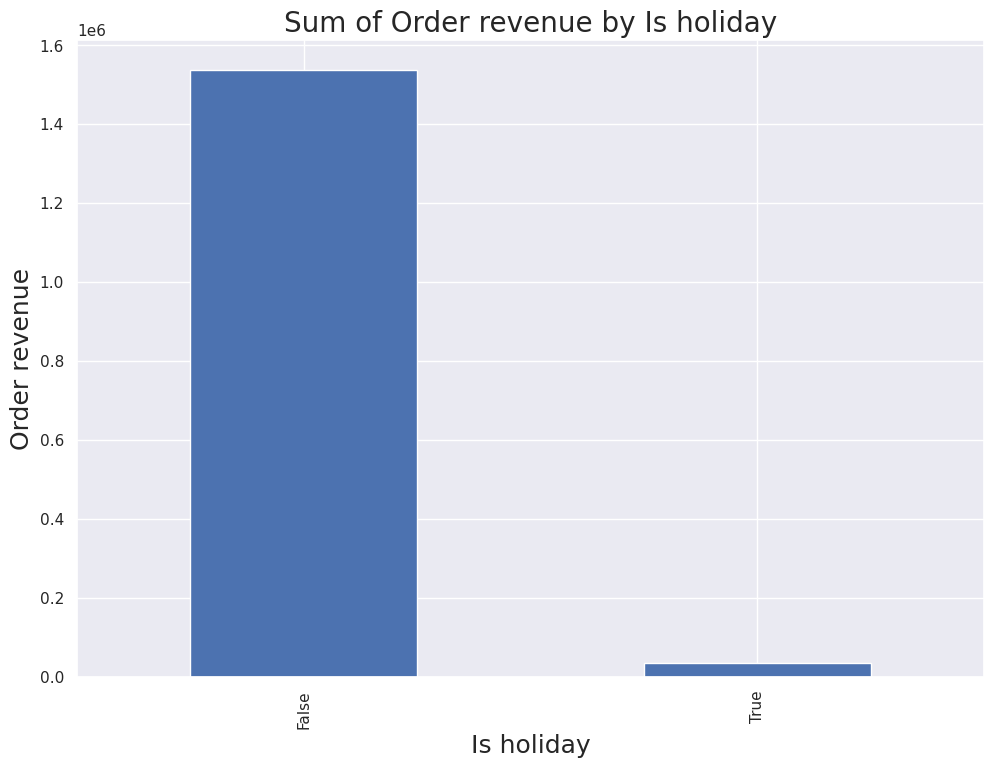

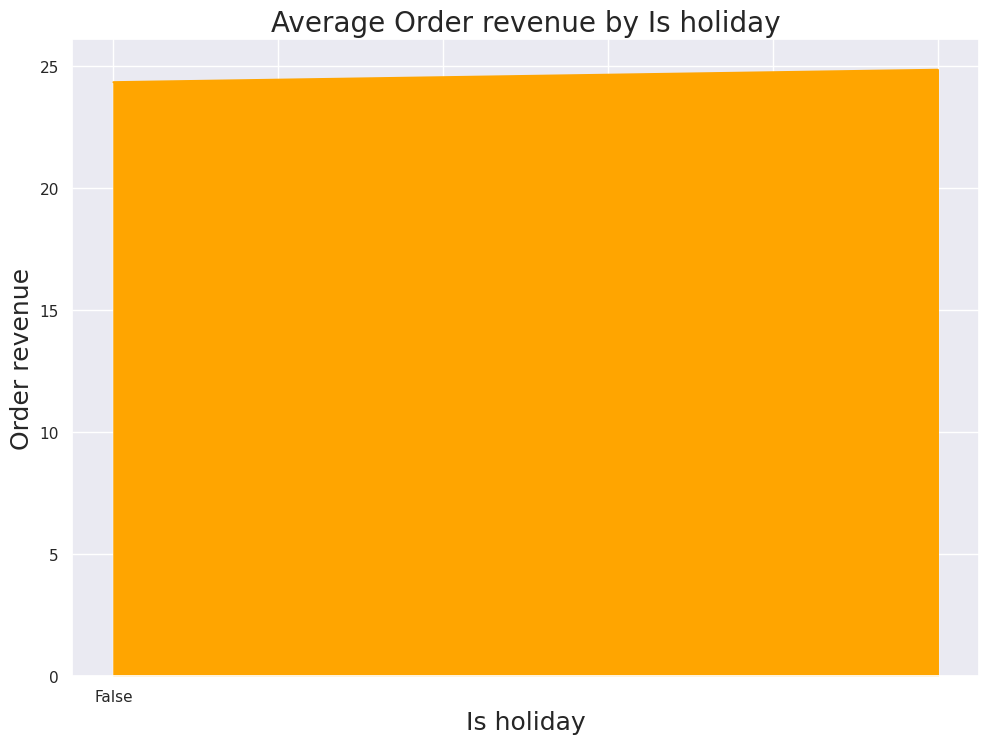

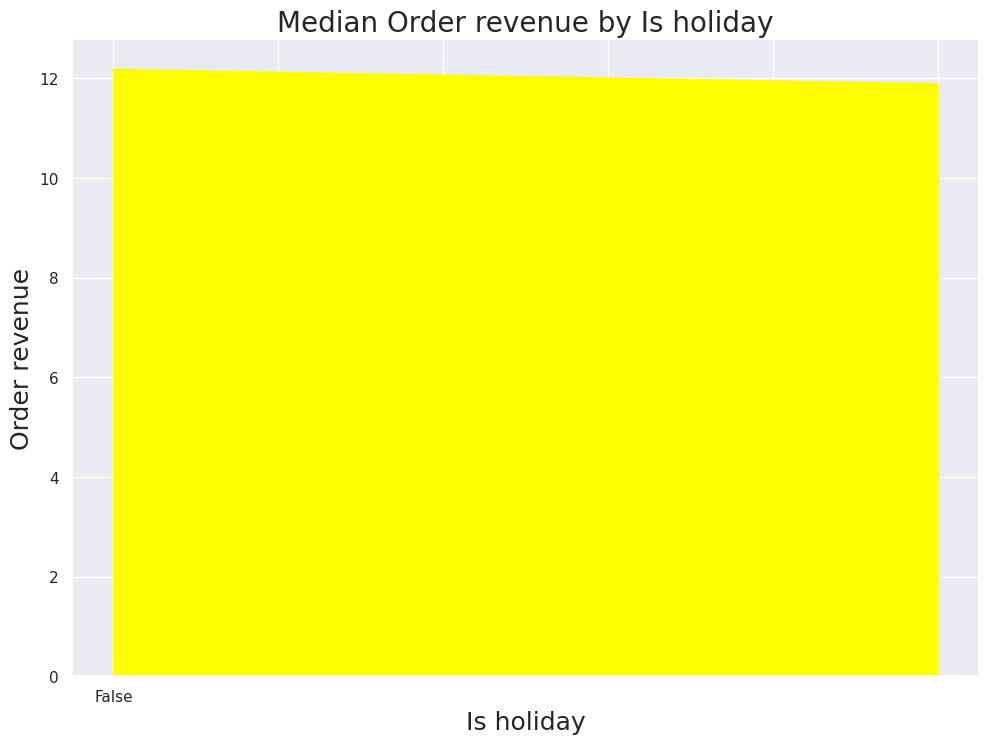

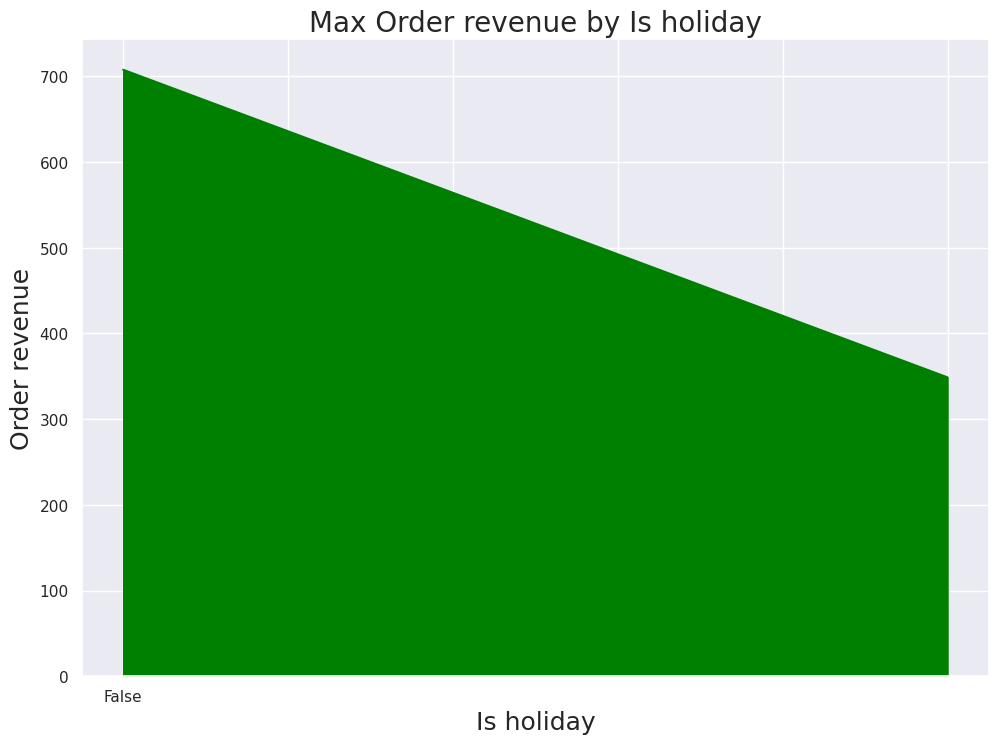

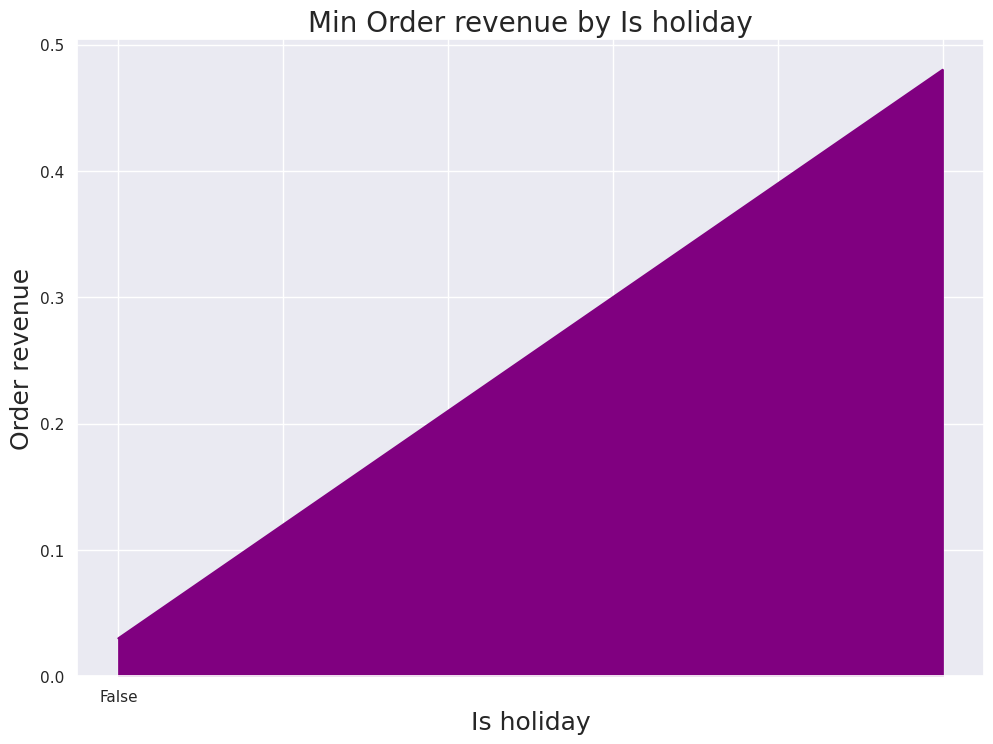

In [98]:
plot_statistical_data(transactions, ['is_holiday'], geo_sum_cols)

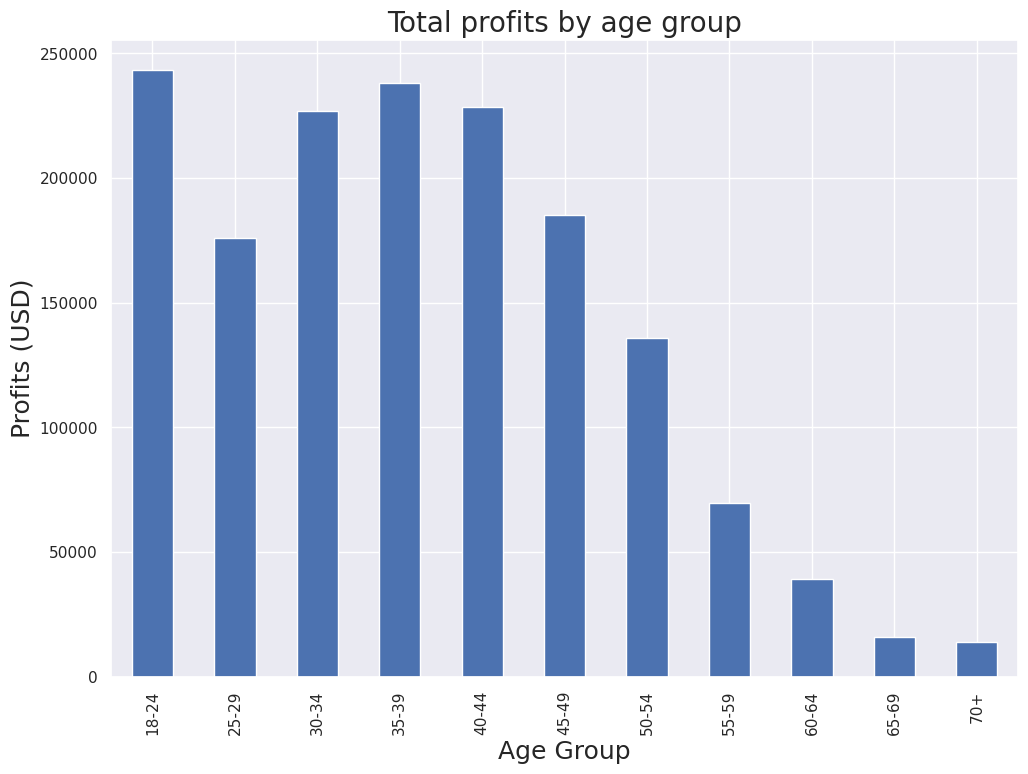

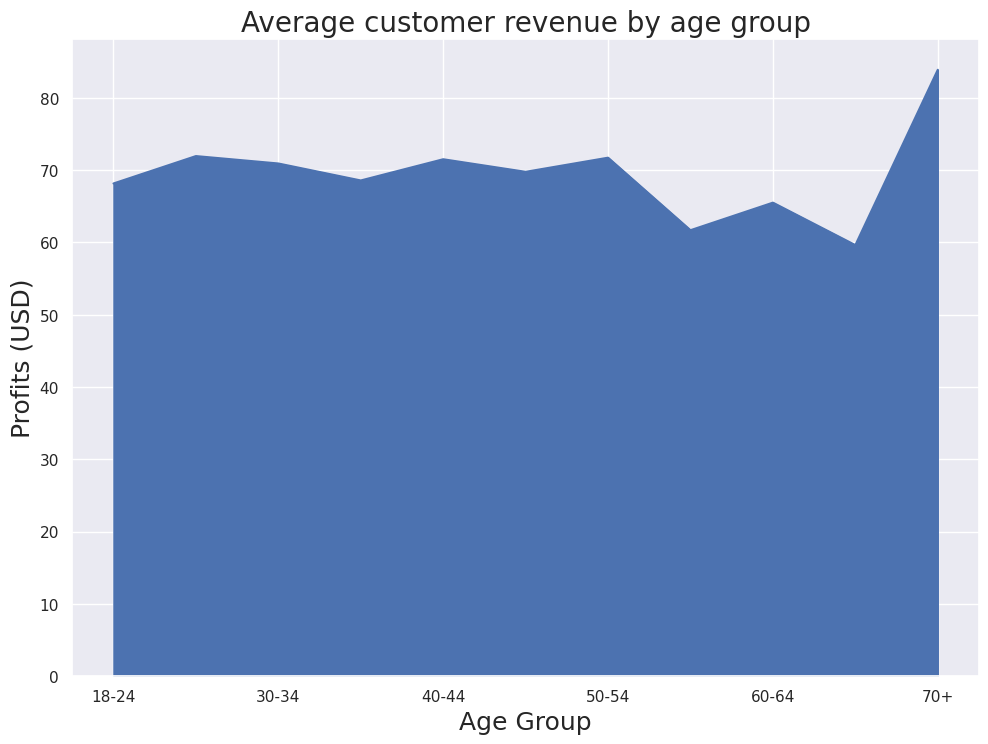

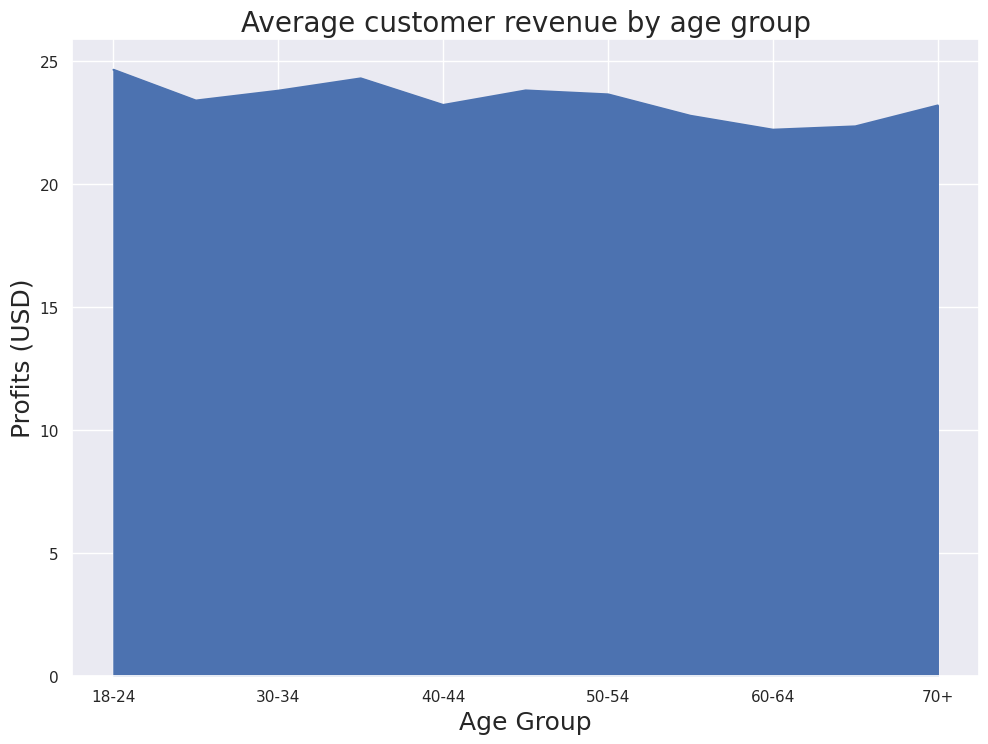

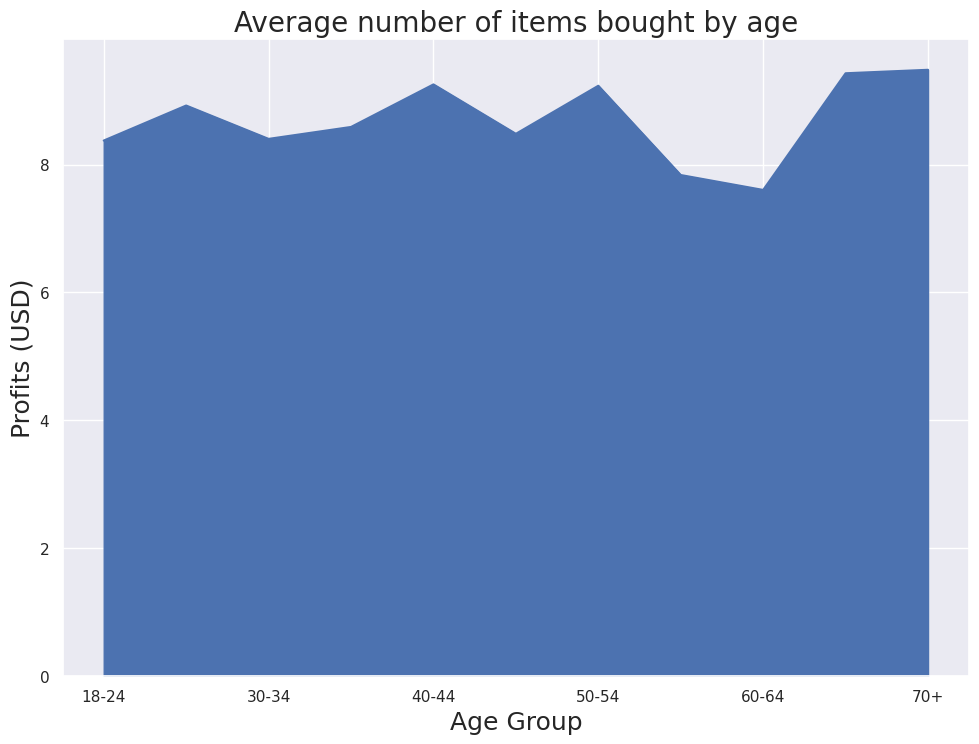

In [22]:
#Plotting the profits per age group
customers_df[["age_bin","total_revenue"]].groupby("age_bin").sum().reset_index().plot(x="age_bin", y="total_revenue",kind="bar",legend=False)
plt.title('Total profits by age group')
plt.ylabel('Profits (EUR)')
plt.xlabel('Age Group')
plt.show()

customers_df[["age_bin","total_revenue"]].groupby("age_bin").mean().reset_index().plot(x="age_bin", y="total_revenue",kind="area",legend=False)
plt.title('Average customer revenue by age group')
plt.ylabel('Profits (EUR)')
plt.xlabel('Age Group')
plt.show()

customers_df[["age_bin","total_revenue"]].groupby("age_bin").median().reset_index().plot(x="age_bin", y="total_revenue",kind="area",legend=False)
plt.title('Average customer revenue by age group')
plt.ylabel('Profits (EUR)')
plt.xlabel('Age Group')
plt.show()

customers_df[["age_bin","items_bought"]].groupby("age_bin").mean().reset_index().plot(x="age_bin", y="items_bought",kind="area",legend=False)
plt.title('Average number of items bought by age')
plt.ylabel('Profits (EUR)')
plt.xlabel('Age Group')
plt.show()

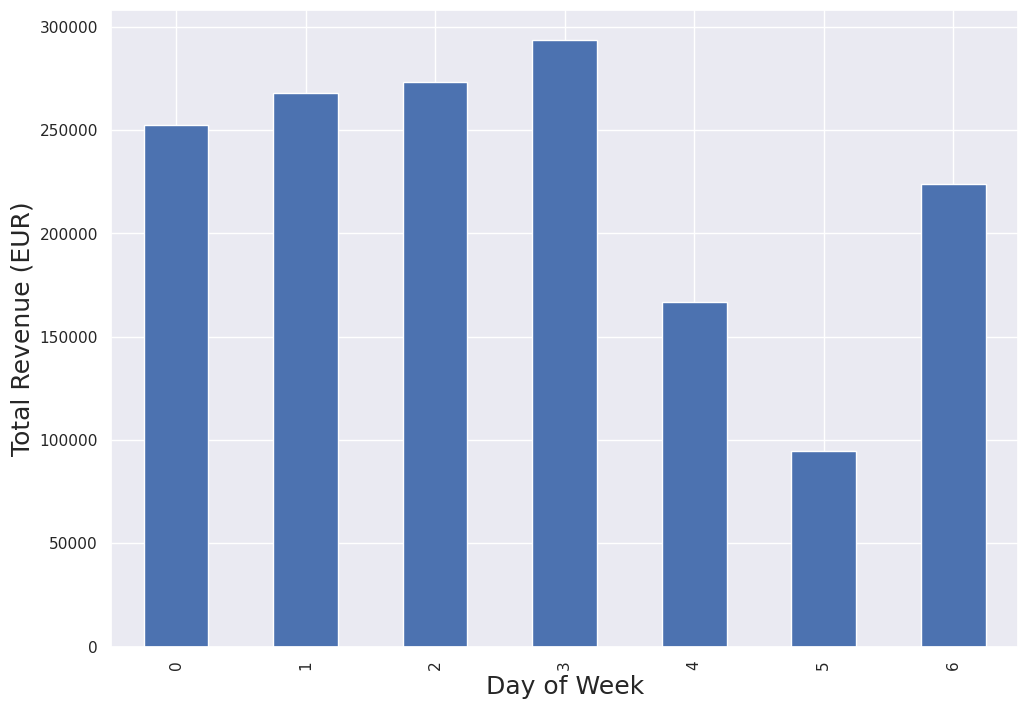

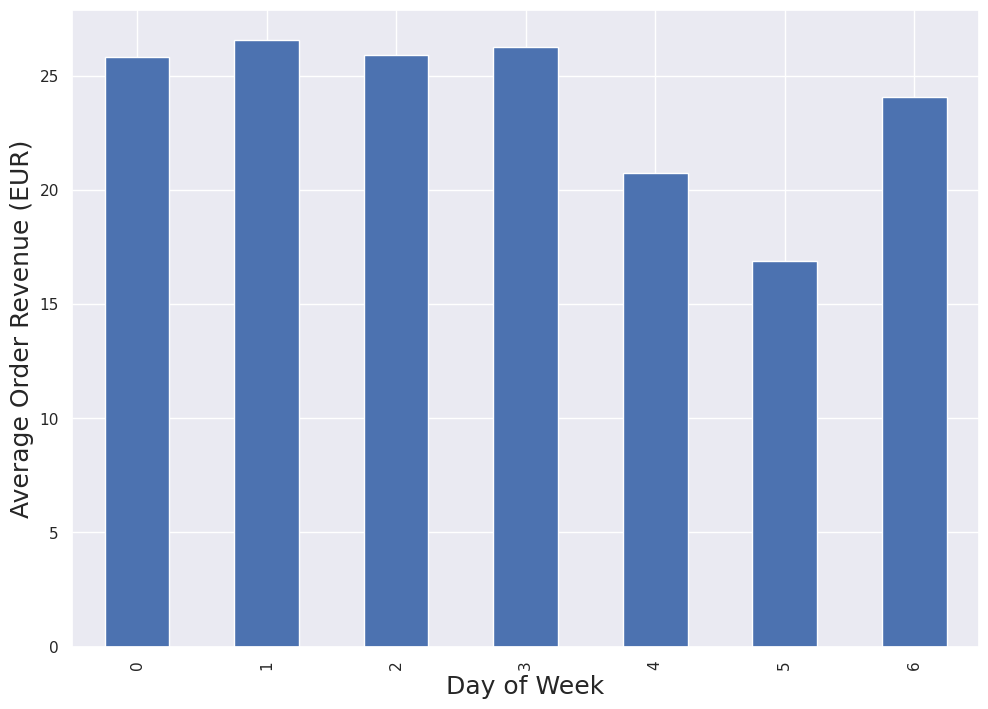

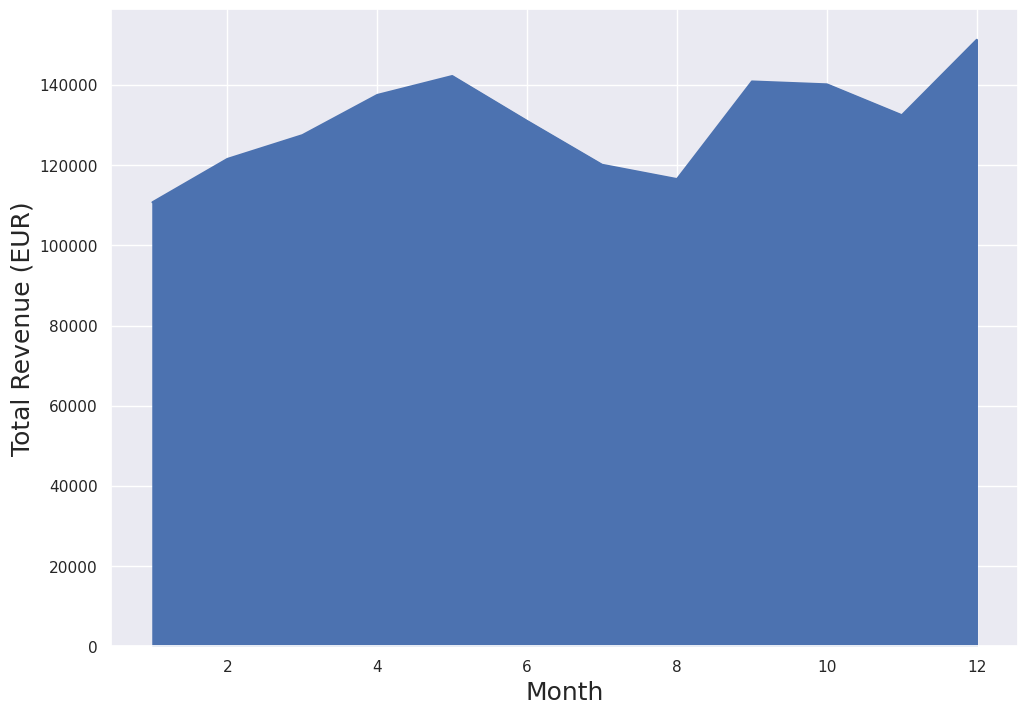

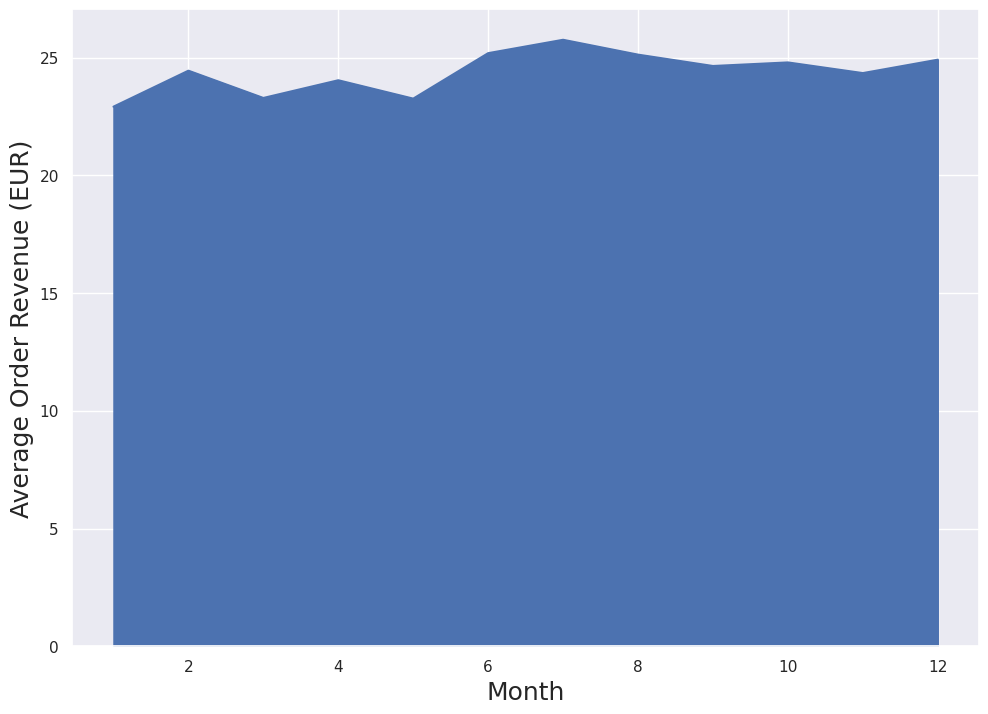

In [111]:
transactions['weekday'] = transactions.date.dt.day_of_week
transactions.groupby('weekday').sum(numeric_only=True).reset_index().plot(x='weekday', y='order_revenue', kind='bar', legend=False)
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (EUR)')
plt.show()
transactions.groupby('weekday').mean(numeric_only=True).reset_index().plot(x='weekday', y='order_revenue', kind='bar', legend=False)
plt.xlabel('Day of Week')
plt.ylabel('Average Order Revenue (EUR)')
plt.show()
transactions.groupby('month').sum(numeric_only=True).reset_index().plot(x='month', y='order_revenue', kind='area', legend=False)
plt.xlabel('Month')
plt.ylabel('Total Revenue (EUR)')
plt.show()
transactions.groupby('month').mean(numeric_only=True).reset_index().plot(x='month', y='order_revenue', kind='area', legend=False)
plt.xlabel('Month')
plt.ylabel('Average Order Revenue (EUR)')
plt.show()

## 2 RFM

In [126]:
# Monetary value has already been calculated, it is in the total revenue column of our dataframe
customers_df.head(2)

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU,age_bin,recency,frequency
Customer_ID,,,,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,3.13,6.0,1.0,2021-01-02,2021-04-16,X52,885U7,45-49,259.0,7.0
822,F,39,Germany,3.0,1.666667,5.0,1.666667,20.40,6.800000,8.59,5.46,3.0,1.0,2021-01-02,2021-02-03,TW8,68BRQ,35-39,331.0,3.0


In [116]:
# Recency
last_purchase_date = max(customers_df['last_date'])
print(last_purchase_date)
customers_df["recency"] = customers_df['last_date'].apply(lambda x: (last_purchase_date - x).days)
customers_df.head(1)

2021-12-31 00:00:00


,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU,age_bin,recency
Customer_ID,,,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,3.13,6.0,1.0,2021-01-02,2021-04-16,X52,885U7,45-49,259.0


In [124]:
# Frequency
freq_df = transactions[["Customer_ID", "date"]].groupby("Customer_ID").agg(frequency = ('date', 'count'))
freq_df.sort_values(by="frequency", ascending=False).head(5)

,frequency
Customer_ID,
1660,99
1665,96
1710,94
1685,82
2186,81


In [125]:
customers_df = pd.merge(customers_df, freq_df, left_index=True, right_index=True, how="left")
customers_df.head(1)

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU,age_bin,recency,frequency
Customer_ID,,,,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,3.13,6.0,1.0,2021-01-02,2021-04-16,X52,885U7,45-49,259.0,7.0


In [127]:
# Calculating Recency (R), Frequency (F) and Monetary value (M) ranks
customers_df['R_rank'] = customers_df['recency'].rank(ascending=False)
customers_df['F_rank'] = customers_df['frequency'].rank(ascending=False)
customers_df['M_rank'] = customers_df['total_revenue'].rank(ascending=False)

customers_df['R_rank_norm'] = 100*customers_df['R_rank']/customers_df['R_rank'].max()
customers_df['F_rank_norm'] = 100*customers_df['F_rank']/customers_df['F_rank'].max()
customers_df['M_rank_norm'] = 100*customers_df['M_rank']/customers_df['M_rank'].max()

customers_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

customers_df.head(2)

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,...,first_date,last_date,most_cat,most_item_SKU,age_bin,recency,frequency,R_rank_norm,F_rank_norm,M_rank_norm
Customer_ID,,,,,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,...,2021-01-02,2021-04-16,X52,885U7,45-49,259.0,7.0,28.656372,11.033847,13.565926
822,F,39,Germany,3.0,1.666667,5.0,1.666667,20.40,6.800000,8.59,...,2021-01-02,2021-02-03,TW8,68BRQ,35-39,331.0,3.0,6.687078,34.655731,54.389888


In [128]:
# Computing RFM
customers_df['RFM_score'] = 0.15*customers_df['R_rank_norm'] + 0.28*customers_df['F_rank_norm'] + 0.57*customers_df['M_rank_norm']
customers_df['RFM_score'] = customers_df['RFM_score'].apply(lambda x: round(x,2)*0.05)
customers_df.head(2)

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,...,last_date,most_cat,most_item_SKU,age_bin,recency,frequency,R_rank_norm,F_rank_norm,M_rank_norm,RFM_score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,...,2021-04-16,X52,885U7,45-49,259.0,7.0,28.656372,11.033847,13.565926,0.7560
822,F,39,Germany,3.0,1.666667,5.0,1.666667,20.40,6.800000,8.59,...,2021-02-03,TW8,68BRQ,35-39,331.0,3.0,6.687078,34.655731,54.389888,2.0855


In [131]:

customers_df["customer_segment"] = None
customers_df.loc[(pd.isna(customers_df['customer_segment'])) & (customers_df['RFM_score'] > 4.5), 'customer_segment'] = 'Top Customer'
customers_df.loc[(pd.isna(customers_df['customer_segment'])) & (customers_df['RFM_score'] > 4), 'customer_segment'] = 'High Value Customers'
customers_df.loc[(pd.isna(customers_df['customer_segment'])) & (customers_df['RFM_score'] > 3), 'customer_segment'] = 'Medium Value Customer'
customers_df.loc[(pd.isna(customers_df['customer_segment'])) & (customers_df['RFM_score'] > 1.6), 'customer_segment'] = 'Low Value Customer'
customers_df.loc[(pd.isna(customers_df['customer_segment'])) & (customers_df['RFM_score'] <= 1.6), 'customer_segment'] = 'Lost Customer'

customers_df.head(5)

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,...,most_cat,most_item_SKU,age_bin,recency,frequency,R_rank_norm,F_rank_norm,M_rank_norm,RFM_score,customer_segment
Customer_ID,,,,,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,...,X52,885U7,45-49,259.0,7.0,28.656372,11.033847,13.565926,0.7560,Lost Customer
822,F,39,Germany,3.0,1.666667,5.0,1.666667,20.40,6.800000,8.59,...,TW8,68BRQ,35-39,331.0,3.0,6.687078,34.655731,54.389888,2.0855,Low Value Customer
3686,F,56,Greece,15.0,3.333333,63.0,4.200000,405.44,27.029333,138.13,...,0H2,B87MU,55-59,298.0,15.0,16.755414,2.618050,2.948729,0.2465,Lost Customer
3719,F,49,Spain,10.0,4.700000,70.0,7.000000,420.72,42.072000,224.98,...,0KX,W14J3,45-49,301.0,10.0,15.794728,5.949303,2.758346,0.2805,Lost Customer
9200,M,18,Italy,2.0,1.000000,2.0,1.000000,18.01,9.005000,11.13,...,0H2,K8EHH,18-24,266.0,2.0,26.644036,53.314909,58.120074,2.6025,Low Value Customer


## 5 CLV calculation
### Churn rate

In [ ]:
num_customers = len(orders.Customer_ID.unique())
churn_df = orders.groupby("Customer_ID").nunique()[["Transaction_ID"]]
churn_rate = 1- len(churn_df[churn_df.Transaction_ID > 1])/num_customers
churn_rate

0.5101390241742673

In [ ]:
churn_df

,Transaction_ID
Customer_ID,
1,1
2,2
3,1
4,2
5,5
...,...
22621,1
22622,1
22623,1


### Average Purchase Frequency

In [ ]:
apf = len(orders.Transaction_ID.unique())/num_customers
apf

2.856017001682458

### Average Purchase Value

In [ ]:
apv = orders.Sales_Amount.sum()/num_customers
apv

69.59138094394757

### Customer Lifetime Value (CLV)

In [ ]:
clv = apv*apf/churn_rate
clv

389.60784752389185